<a href="https://colab.research.google.com/github/reflectormensah/Financial-Engineering-Data-Science/blob/main/GSE_CI_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing package and data

In [ ]:
! pip install arch
! pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 23.6 MB/s eta 0:00:00


In [ ]:
# Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [ ]:
from google.colab import files

# manually upload the GSE CI data"
uploaded = files.upload()

Saving GSE CI Data.xlsx to GSE CI Data.xlsx


In [ ]:
df_ci = uploaded['GSE CI Data.xlsx']

In [ ]:
import pandas as pd

df_ci = pd.read_excel('GSE CI Data.xlsx') # Use read_excel for Excel files

# Convert the 'Date' column to datetime
df_ci['DATE'] = pd.to_datetime(df_ci['DATE'])
df_ci.set_index('DATE',inplace=True)

df_ci.head()

,INDEX,VOLUME,SALES (GH¢),CAP. (GH¢ 'M),Return
DATE,,,,,
2010-12-31,1000,NaN,NaN,NaN,NaN
2011-01-04,992.25,63522,213290.88,20012.232236,-0.00775
2011-01-05,991.08,1315379,3050487.51,19992.076183,-0.00892
2011-01-06,993.894903,67191,109137.83,20006.109196,-0.006105
2011-01-07,995.498183,271954,302913.67,20014.015882,-0.004502


In [ ]:
df_ci.reset_index(inplace=True)

In [ ]:
df_ci.rename(columns={'DATE': 'Date', 'INDEX': 'Index', 'VOLUME': 'Volume', 'SALES (GH¢)': 'Sales', 'Return':'Return'}, inplace=True)

df_ci = df_ci[['Date', 'Index', 'Volume', 'Sales', 'Return']]

df_ci.head()


,Date,Index,Volume,Sales,Return
0,2010-12-31,1000,NaN,NaN,NaN
1,2011-01-04,992.25,63522,213290.88,-0.00775
2,2011-01-05,991.08,1315379,3050487.51,-0.00892
3,2011-01-06,993.894903,67191,109137.83,-0.006105
4,2011-01-07,995.498183,271954,302913.67,-0.004502


## Data Cleaning

In [ ]:
df_ci.dropna(inplace=True)

In [ ]:
print(df_ci.isna().sum())


Date      0
Index     0
Volume    0
Sales     0
Return    0
dtype: int64


##Exploratory Data Analysis

In [ ]:
df_ci['Index'].describe()

,Index
count,3413.000000
unique,3032.000000
top,2460.307668
freq,8.000000


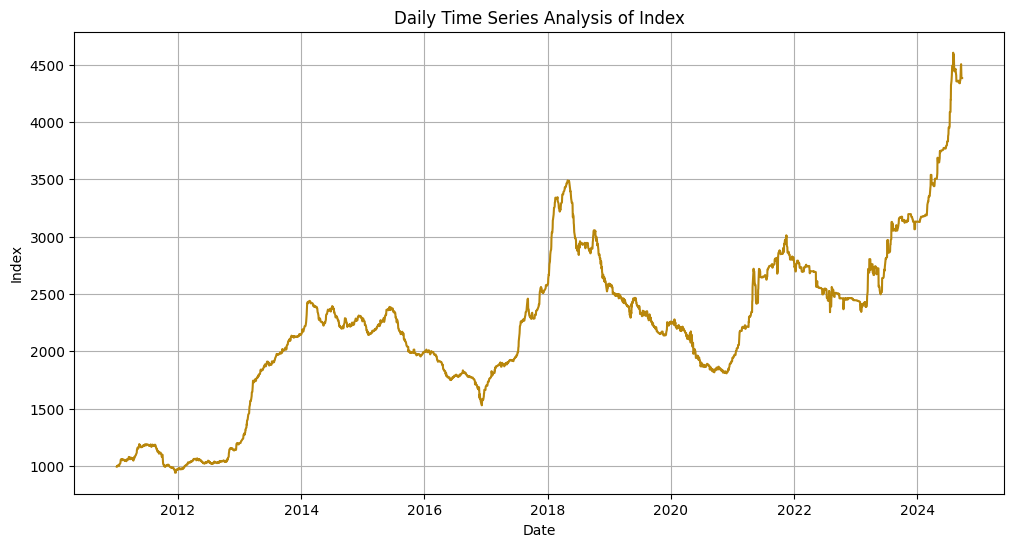

In [ ]:
# Convert 'na' values to NaN
df_ci['Index'] = pd.to_numeric(df_ci['Index'], errors='coerce')


df_ci.dropna(subset=['Index'], inplace=True)

# Plot time series data
plt.figure(figsize=(12, 6))
plt.plot(df_ci['Date'], df_ci['Index'], color ='darkgoldenrod')
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Daily Time Series Analysis of Index')
plt.grid(True)
plt.show()


In [ ]:
# Converting to quarterly data
df_ci['Date'] = pd.to_datetime(df_ci['Date'])

# Set 'Date' column as index
df_ci = df_ci.set_index('Date')

# Group the data by quarter and year, taking the average of each quarter
quarterly_data = df_ci[['Index']].resample('Q').last()

# Print the resulting quarterly data
print(quarterly_data)

                  Index
Date                   
2011-03-31  1071.504858
2011-06-30  1188.906107
2011-09-30  1098.382697
2011-12-31   969.028191
2012-03-31  1046.878064
2012-06-30  1045.475585
2012-09-30  1047.722049
2012-12-31  1199.720000
2013-03-31  1733.465622
2013-06-30  1880.260266
2013-09-30  2030.958510
2013-12-31  2145.199024
2014-03-31  2386.344042
2014-06-30  2373.380000
2014-09-30  2239.675547
2014-12-31  2261.020596
2015-03-31  2220.369445
2015-06-30  2352.228568
2015-09-30  2009.524168
2015-12-31  1994.910000
2016-03-31  1912.017969
2016-06-30  1787.500475
2016-09-30  1774.900495
2016-12-31  1689.090000
2017-03-31  1865.012015
2017-06-30  1964.550000
2017-09-30  2326.088491
2017-12-31  2579.718367
2018-03-31  3366.850000
2018-06-30  2879.434818
2018-09-30  3001.007131
2018-12-31  2572.218886
2019-03-31  2454.510666
2019-06-30  2394.823089
2019-09-30  2204.793888
2019-12-31  2257.154364
2020-03-31  2159.606618
2020-06-30  1899.898062
2020-09-30  1856.556035
2020-12-31  1941

<ipython-input-12-0d1b78dc382e>:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = df_ci[['Index']].resample('Q').last()


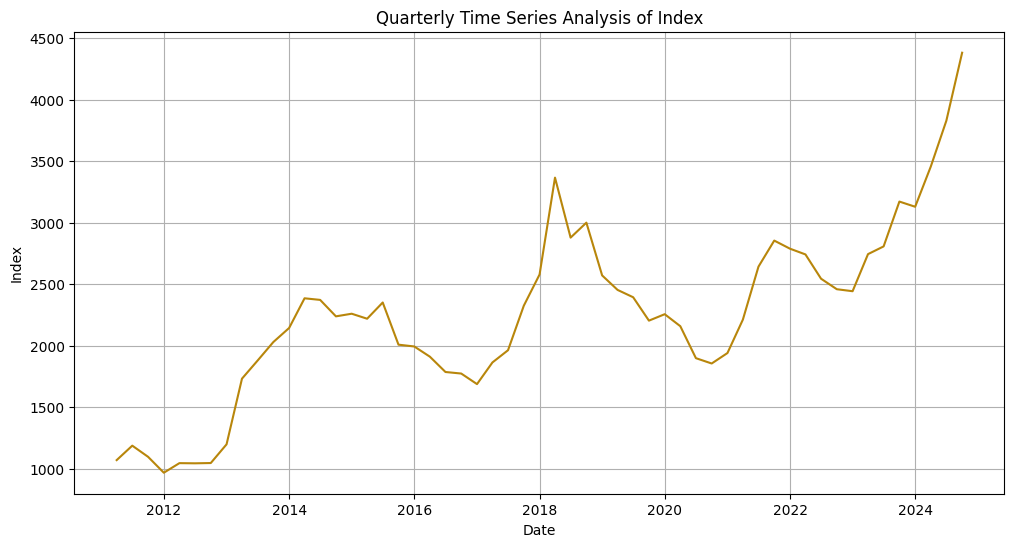

In [ ]:
# Convert 'na' values to NaN
quarterly_data['Index'] = pd.to_numeric(quarterly_data['Index'], errors='coerce')

quarterly_data.dropna(subset=['Index'], inplace=True)

# Plot time series data
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data['Index'], color='darkgoldenrod') # Use .index to access the dates
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Quarterly Time Series Analysis of Index')
plt.grid(True)
plt.show()

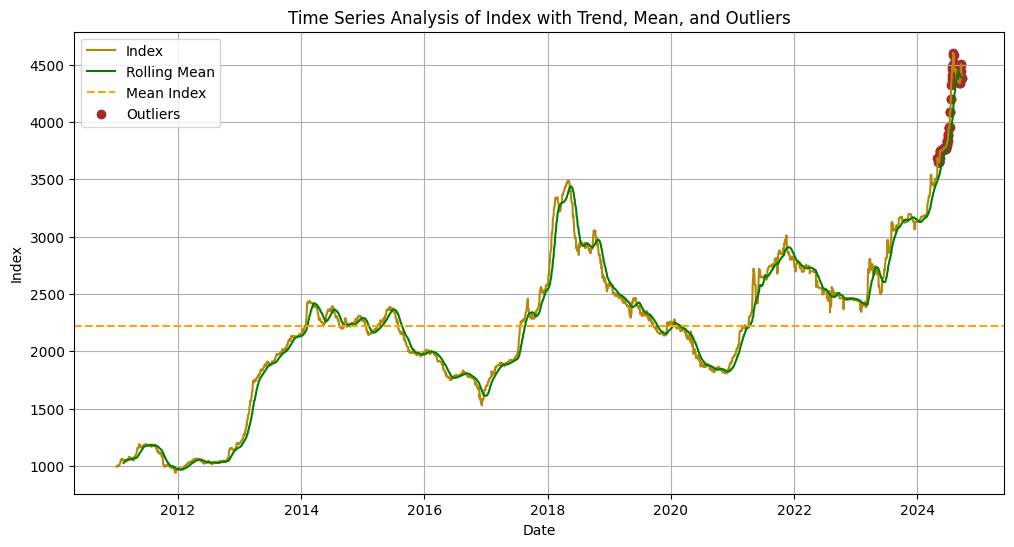

In [ ]:
# Calculate the rolling mean
df_ci['Index_Rolling_Mean'] = df_ci['Index'].rolling(window=30).mean()

# Calculate the mean of the Index
mean_index = df_ci['Index'].mean()

# Identify outliers
std_index = df_ci['Index'].std()
df_ci['Outlier'] = np.abs(df_ci['Index'] - mean_index) > 2 * std_index

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_ci.index, df_ci['Index'], label='Index', color='darkgoldenrod') # Use .index to access the dates
plt.plot(df_ci.index, df_ci['Index_Rolling_Mean'], label='Rolling Mean', color='green')
plt.axhline(y=mean_index, color='orange', linestyle='--', label='Mean Index')
plt.scatter(df_ci[df_ci['Outlier']].index, df_ci[df_ci['Outlier']]['Index'], color='brown', label='Outliers') # Use .index to access the dates

plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Time Series Analysis of Index with Trend, Mean, and Outliers')
plt.legend()
plt.grid(True)
plt.show()

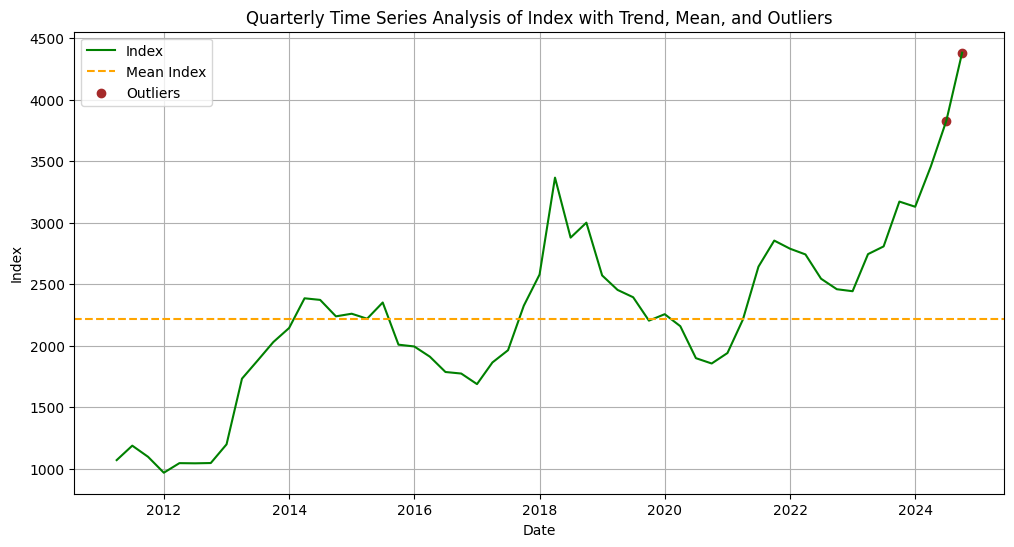

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data['Index'], label='Index', color='green') # Use .index to access the dates
#plt.plot(quarterly_data.index, quarterly_data['Index_Rolling_Mean'], label='Rolling Mean', color='green') # Use .index to access the dates
plt.axhline(y=mean_index, color='orange', linestyle='--', label='Mean Index')

# Calculate outliers for quarterly data
mean_index_quarterly = quarterly_data['Index'].mean()
std_index_quarterly = quarterly_data['Index'].std()
quarterly_data['Outlier'] = np.abs(quarterly_data['Index'] - mean_index_quarterly) > 2 * std_index_quarterly

plt.scatter(quarterly_data[quarterly_data['Outlier']].index, quarterly_data[quarterly_data['Outlier']]['Index'], color='brown', label='Outliers') # Use .index to access the dates

plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Quarterly Time Series Analysis of Index with Trend, Mean, and Outliers')
plt.legend()
plt.grid(True)
plt.show()

### ARIMA Modeling

In [ ]:
import statsmodels.tsa.stattools as sm

Zt = df_ci['Index']
df_diff = Zt.diff().dropna()

def test_stationarity(timeseries):
  result = sm.adfuller(timeseries)
  test_statistic, p_value, _, _, crit_values, _ = result

  print("------------------------------------------------------------------")
  print("ADF Test for stationarity")
  print()
  print(f"ADF Test Statistic: {test_statistic:.3g}")
  print(f"p-value:            {p_value:.3g}")
  print(f"Critical values")
  for percent in crit_values: # crit_values is a dictionary
    print(f"\t\t\t{percent}: {crit_values[percent]:.3g}")

  print()
  if p_value < 0.05:
      print("The series is likely stationary (reject the null hypothesis).")
  else:
      print("The series is likely non-stationary (fail to reject the null hypothesis).")

  print("------------------------------------------------------------------")

In [ ]:
test_stationarity(df_diff)

------------------------------------------------------------------
ADF Test for stationarity

ADF Test Statistic: -15
p-value:            9.6e-28
Critical values
			1%: -3.43
			5%: -2.86
			10%: -2.57

The series is likely stationary (reject the null hypothesis).
------------------------------------------------------------------


In [ ]:
Zt1 = quarterly_data['Index']
quarterly_diff = Zt1.diff().dropna()

test_stationarity(quarterly_diff)

------------------------------------------------------------------
ADF Test for stationarity

ADF Test Statistic: -3.19
p-value:            0.0206
Critical values
			1%: -3.57
			5%: -2.92
			10%: -2.6

The series is likely stationary (reject the null hypothesis).
------------------------------------------------------------------


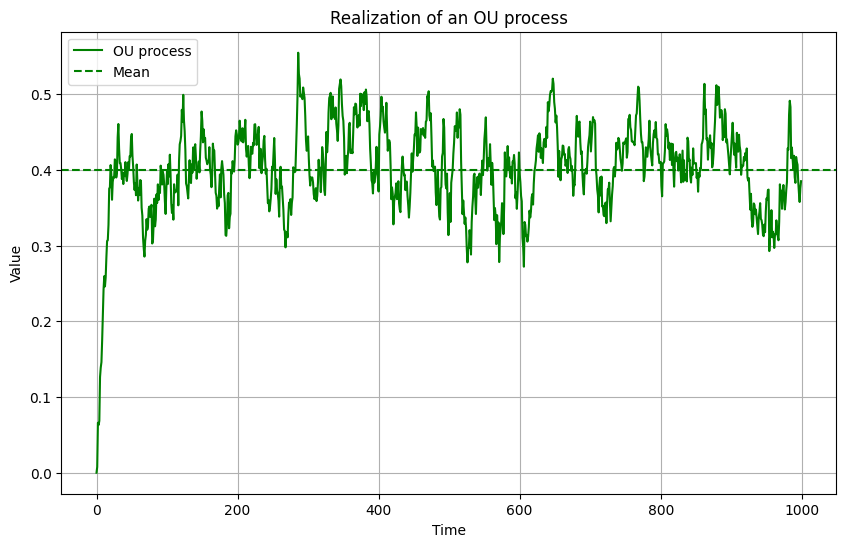

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sm

def generate_OU(theta, mu, sigma, dt, n=1000):
  """Generates an Ornstein-Uhlenbeck process."""
  x = np.zeros(n)
  for i in range(1, n):
    x[i] = x[i-1] + theta * (mu - x[i-1]) * dt + sigma * np.sqrt(dt) * np.random.randn()
  return x


def test_stationarity(Zt):
  result = sm.adfuller(Zt)
  test_statistic, p_value, _, _, crit_values, _ = result

  print("------------------------------------------------------------------")
  print("ADF Test for stationarity") # removed the undefined function call print_bold
  print()
  print(f"ADF Test Statistic: {test_statistic:.3g}")
  print(f"p-value:            {p_value:.3g}")
  print(f"Critical values")
  for percent in crit_values: # crit_values is a dictionary
    print(f"\t\t\t{percent}: {crit_values[percent]:.3g}")

  print()
  if p_value < 0.05:
      print("The series is likely stationary (reject the null hypothesis).")
  else:
      print("The series is likely non-stationary (fail to reject the null hypothesis).")

  print("------------------------------------------------------------------")

def show_ACF(Zt, gamma_pred=None, gamma_true=None, lags=10):
  statsmodels.graphics.tsaplots.plot_acf(df_diff, lags=lags)

  # plot theoretical ACF
  k = np.arange(lags+1)

  if not gamma_pred is None:
    decay = np.exp(-gamma_pred * k)  # ACF is 1 when k=0
    plt.plot(k, decay, label=f'Using predicted speed', color='o', linestyle='--')

  if not gamma_true is None:
    decay = np.exp(-gamma_true * k)
    plt.plot(k, decay, label=f'Using actual speed', color='o', linestyle='--')

  plt.legend()
  plt.title(f'ACF of Time Series (First {lags} Lags)')
  plt.show()

def plot_series(series_list, series_names, title=None, mean=None, color=None): # Added color as an argument
    """Plots multiple time series on the same axes."""

    plt.figure(figsize=(10, 6))

    for i, series in enumerate(series_list):
        plt.plot(series, label=series_names[i], color=color) # Pass color argument to plt.plot

    if mean is not None:
        plt.axhline(y=mean, color='g', linestyle='--', label='Mean')

    plt.xlabel('Time')
    plt.ylabel('Value')
    if title:
        plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


theta_true = 0.02
mu_true = 0.4
sigma_true = 0.01
dt = 4

noise = generate_OU(theta_true, mu_true, sigma_true, dt)
plot_series([noise], ["OU process"],
            title="Realization of an OU process",
            mean=mu_true, color='g')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Example DataFrame (replace with your actual data)
np.random.seed(0)
data = np.random.normal(size=100)
#df = pd.DataFrame(data, columns=['Price'])
df = df_ci['Index']


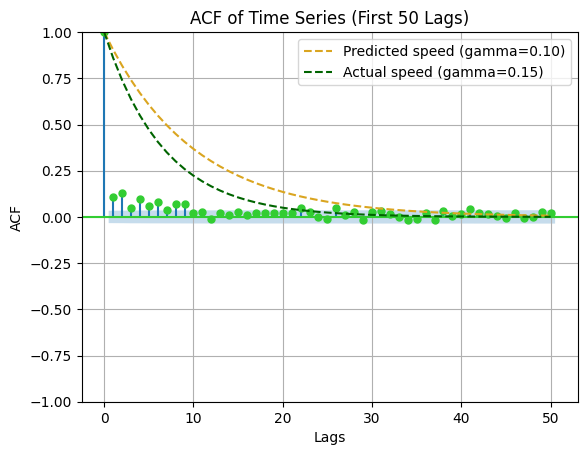

In [ ]:
def show_ACF(Zt, gamma_pred=None, gamma_true=None, lags=50):
    # Plot the empirical ACF
    plot_acf(Zt, lags=lags, color='limegreen')

    # Plot theoretical ACF based on predicted and actual speeds
    k = np.arange(lags + 1)

    if gamma_pred is not None:
        decay_pred = np.exp(-gamma_pred * k)  # Predicted ACF decay
        plt.plot(k, decay_pred, label=f'Predicted speed (gamma={gamma_pred:.2f})', color='goldenrod', linestyle='--')

    if gamma_true is not None:
        decay_true = np.exp(-gamma_true * k)  # Actual ACF decay
        plt.plot(k, decay_true, label=f'Actual speed (gamma={gamma_true:.2f})', color='darkgreen', linestyle='--')

    # Adding labels and legends for clarity
    plt.xlabel('Lags')
    plt.ylabel('ACF')
    plt.legend()
    plt.title(f'ACF of Time Series (First {lags} Lags)')
    plt.grid(True)
    plt.show()

theta_pred = 0.1
theta_true = 0.15
dt = 1

# Using the actual data df_diff, to plot ACF and compare predicted/actual speeds
show_ACF(df_diff, gamma_pred=theta_pred * dt, gamma_true=theta_true * dt, lags=50)


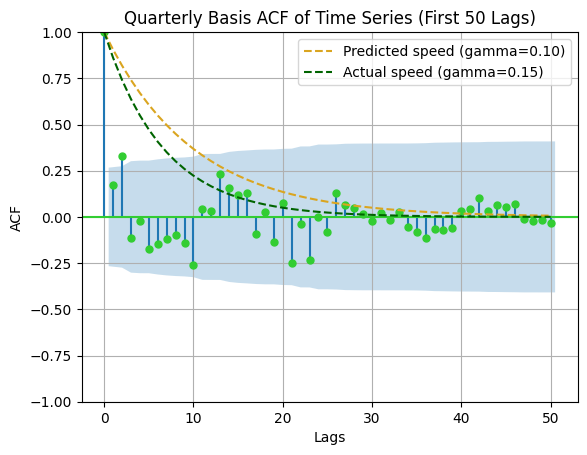

In [ ]:
def show_ACF(Zt1, gamma_pred=None, gamma_true=None, lags=50):
    # Plot the empirical ACF
    plot_acf(Zt1, lags=lags, color='limegreen')

    # Plot theoretical ACF based on predicted and actual speeds
    k = np.arange(lags + 1)

    if gamma_pred is not None:
        decay_pred = np.exp(-gamma_pred * k)  # Predicted ACF decay
        plt.plot(k, decay_pred, label=f'Predicted speed (gamma={gamma_pred:.2f})', color='goldenrod', linestyle='--')

    if gamma_true is not None:
        decay_true = np.exp(-gamma_true * k)  # Actual ACF decay
        plt.plot(k, decay_true, label=f'Actual speed (gamma={gamma_true:.2f})', color='darkgreen', linestyle='--')

    # Adding labels and legends for clarity
    plt.xlabel('Lags')
    plt.ylabel('ACF')
    plt.legend()
    plt.title(f'Quarterly Basis ACF of Time Series (First {lags} Lags)')
    plt.grid(True)
    plt.show()

theta_pred = 0.1
theta_true = 0.15
dt = 1

# Using the actual data df_diff, to plot ACF and compare predicted/actual speeds
show_ACF(quarterly_diff, gamma_pred=theta_pred * dt, gamma_true=theta_true * dt, lags=50)


In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit an AR(1) model to estimate the decay (speed) parameter
model = AutoReg(df_diff, lags=1).fit()
gamma_pred = -np.log(model.params[1])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<ipython-input-23-6cd0750e944b>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma_pred = -np.log(model.params[1])


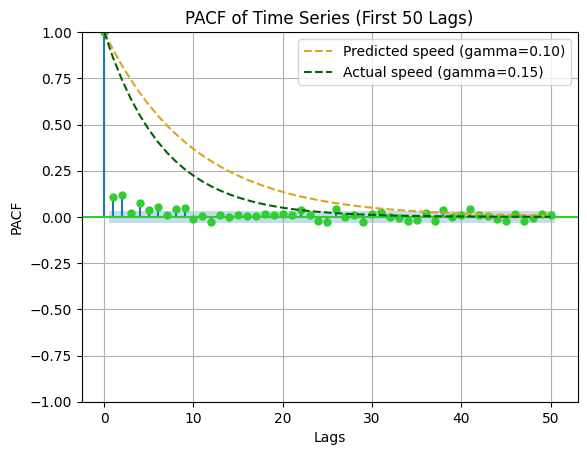

In [ ]:
def show_ACF(Zt, gamma_pred=None, gamma_true=None, lags=50):

    # Calculate the maximum allowable lags
    max_lags = len(Zt) // 2 -1

    # Ensure lags does not exceed the maximum
    lags = min(lags, max_lags)

    # Plot the empirical PACF
    plot_pacf(Zt, lags=lags, color='limegreen')

    # Plot theoretical PACF based on predicted and actual speeds
    k = np.arange(lags + 1)

    if gamma_pred is not None:
        decay_pred = np.exp(-gamma_pred * k)  # Predicted PACF decay
        plt.plot(k, decay_pred, label=f'Predicted speed (gamma={gamma_pred:.2f})', color='goldenrod', linestyle='--')

    if gamma_true is not None:
        decay_true = np.exp(-gamma_true * k)  # Actual PACF decay
        plt.plot(k, decay_true, label=f'Actual speed (gamma={gamma_true:.2f})', color='darkgreen', linestyle='--')

    # Adding labels and legends for clarity
    plt.xlabel('Lags')
    plt.ylabel('PACF') # Changed from 'ACF' to 'PACF'
    plt.legend()
    plt.title(f'PACF of Time Series (First {lags} Lags)') # Changed from 'ACF' to 'PACF'
    plt.grid(True)
    plt.show()

theta_pred = 0.1
theta_true = 0.15
dt = 1

# Using the actual data df_diff, to plot PACF and compare predicted/actual speeds
show_ACF(df_diff, gamma_pred=theta_pred * dt, gamma_true=theta_true * dt, lags=50)

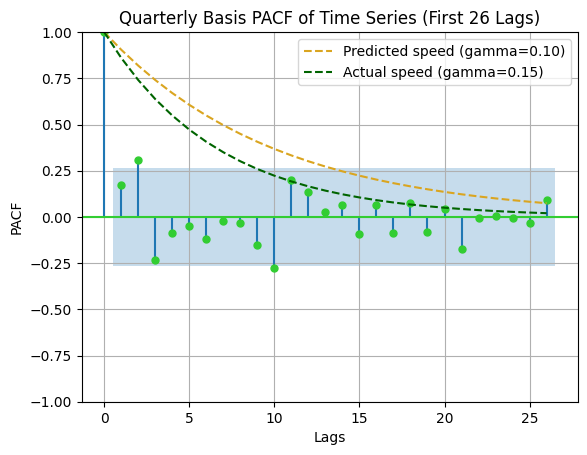

In [ ]:
def show_PACF(Zt1, gamma_pred=None, gamma_true=None, lags=50):

    # Calculate the maximum allowable lags
    max_lags = len(Zt1) // 2 -1

    # Ensure lags does not exceed the maximum
    lags = min(lags, max_lags)

    # Plot the empirical PACF
    plot_pacf(Zt1, lags=lags, color='limegreen')

    # Plot theoretical PACF based on predicted and actual speeds
    k = np.arange(lags + 1)

    if gamma_pred is not None:
        decay_pred = np.exp(-gamma_pred * k)  # Predicted PACF decay
        plt.plot(k, decay_pred, label=f'Predicted speed (gamma={gamma_pred:.2f})', color='goldenrod', linestyle='--')

    if gamma_true is not None:
        decay_true = np.exp(-gamma_true * k)  # Actual PACF decay
        plt.plot(k, decay_true, label=f'Actual speed (gamma={gamma_true:.2f})', color='darkgreen', linestyle='--')

    # Adding labels and legends for clarity
    plt.xlabel('Lags')
    plt.ylabel('PACF')
    plt.legend()
    plt.title(f'Quarterly Basis PACF of Time Series (First {lags} Lags)')
    plt.grid(True)
    plt.show()

theta_pred = 0.1
theta_true = 0.15
dt = 1

# Using the actual data df_diff, to plot PACF and compare predicted/actual speeds
show_PACF(quarterly_diff, gamma_pred=theta_pred * dt, gamma_true=theta_true * dt, lags=50)

In [ ]:
df_ci.tail()

,Index,Volume,Sales,Return,Index_Rolling_Mean,Outlier
Date,,,,,,
2024-09-17,4503.17,261970,1179345.21,0.4386,4389.910667,True
2024-09-18,4442.52,71968,176391.16,0.4192,4389.565333,True
2024-09-19,4381.86,350389,714820.61,0.3999,4387.602667,True
2024-09-20,4381.86,130204,244302.16,0.3999,4385.638667,True
2024-09-23,4381.86,0,0,0.3999,4383.242667,True


In [ ]:
quarterly_data = quarterly_data[['Index']]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the p, d, and q parameters to test
p = d = q = range(0, 5)  # You can adjust the range as needed
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best models and their AIC and BIC
best_aic = float('inf')
best_bic = float('inf')
best_model_bic = None
best_pdq_aic = None
best_pdq_bic = None

# Iterate through all possible combinations of p, d, and q
for param in pdq:
    try:
        # Fit the ARIMA model
        model = ARIMA(df_ci['Index'], order=param).fit()

        # Check for the lowest AIC
        if model.aic < best_aic:  # Finding the model with the lowest AIC
            best_aic = model.aic
            best_model_aic = model
            best_pdq_aic = param

        # Check for the lowest BIC
        if model.bic < best_bic:  # Finding the model with the lowest BIC
            best_bic = model.bic
            best_model_bic = model
            best_pdq_bic = param

        print(f"ARIMA{param} - AIC:{model.aic:.2f}, BIC:{model.bic:.2f}")

    except Exception as e:
        print(f"ARIMA{param} - Failed to fit. Error: {e}")

# Print the best models based on AIC and BIC
if best_pdq_aic is not None and best_pdq_bic is not None:
    print(f"\nBest ARIMA model based on AIC: ARIMA{best_pdq_aic} with AIC: {best_aic:.2f}")
    print(f"Best ARIMA model based on BIC: ARIMA{best_pdq_bic} with BIC: {best_bic:.2f}")
else:
    print("\nNo ARIMA model could be successfully fit.")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) - AIC:54363.99, BIC:54376.26


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 1) - AIC:49775.53, BIC:49793.94


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 2) - AIC:47662.76, BIC:47687.30


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 3) - AIC:48029.13, BIC:48059.81


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 4) - AIC:44592.93, BIC:44629.73
ARIMA(0, 1, 0) - AIC:29193.13, BIC:29199.27


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1) - AIC:29162.45, BIC:29174.72


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2) - AIC:29115.21, BIC:29133.62


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 3) - AIC:29115.34, BIC:29139.88


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 4) - AIC:29099.55, BIC:29130.22
ARIMA(0, 2, 0) - AIC:31154.27, BIC:31160.41


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 2, 1) - AIC:29125.81, BIC:29138.07


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 2, 2) - AIC:29115.05, BIC:29133.45


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 2, 3) - AIC:29085.17, BIC:29109.71


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 2, 4) - AIC:29087.06, BIC:29117.73
ARIMA(0, 3, 0) - AIC:34920.98, BIC:34927.11


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 3, 1) - AIC:31156.65, BIC:31168.92


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 3, 2) - AIC:29136.01, BIC:29154.41


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 3, 3) - AIC:29126.81, BIC:29151.35


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 3, 4) - AIC:29097.58, BIC:29128.25
ARIMA(0, 4, 0) - AIC:39059.68, BIC:39065.81


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 4, 1) - AIC:34921.92, BIC:34934.19


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 4, 2) - AIC:31166.36, BIC:31184.76


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 4, 3) - AIC:29207.57, BIC:29232.10


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 4, 4) - AIC:29216.22, BIC:29246.89


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 0) - AIC:29214.75, BIC:29233.15


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 1) - AIC:29184.04, BIC:29208.58


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 2) - AIC:29136.76, BIC:29167.43


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 3) - AIC:29136.87, BIC:29173.68


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 4) - AIC:29121.04, BIC:29163.99
ARIMA(1, 1, 0) - AIC:29154.23, BIC:29166.50


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) - AIC:29074.10, BIC:29092.50


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2) - AIC:29075.84, BIC:29100.38


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 3) - AIC:29071.44, BIC:29102.11


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 4) - AIC:29068.54, BIC:29105.35
ARIMA(1, 2, 0) - AIC:30112.57, BIC:30124.84


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 2, 1) - AIC:29112.10, BIC:29130.50


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 2, 2) - AIC:29127.61, BIC:29152.15


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 2, 3) - AIC:29072.56, BIC:29103.23


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 2, 4) - AIC:29086.71, BIC:29123.52
ARIMA(1, 3, 0) - AIC:32721.52, BIC:32733.79


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 3, 1) - AIC:30115.72, BIC:30134.12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 3, 2) - AIC:29124.13, BIC:29148.66


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 3, 3) - AIC:29138.56, BIC:29169.23


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 3, 4) - AIC:29128.61, BIC:29165.42


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 4, 0) - AIC:35956.54, BIC:35968.80


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 4, 1) - AIC:32724.05, BIC:32742.45


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 4, 2) - AIC:30158.26, BIC:30182.79


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 4, 3) - AIC:29197.48, BIC:29228.15


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 4, 4) - AIC:29179.94, BIC:29216.74


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(2, 0, 0) - AIC:29175.80, BIC:29200.34


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

ARIMA(2, 0, 1) - AIC:29217.72, BIC:29248.39


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

ARIMA(2, 0, 2) - AIC:29120.96, BIC:29157.77
ARIMA(2, 0, 3) - AIC:29092.82, BIC:29135.76


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

ARIMA(2, 0, 4) - AIC:29139.12, BIC:29188.20
ARIMA(2, 1, 0) - AIC:29104.28, BIC:29122.68


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1) - AIC:29075.81, BIC:29100.35


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2) - AIC:29069.48, BIC:29100.15


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 3) - AIC:29066.52, BIC:29103.33


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 1, 4) - AIC:29068.36, BIC:29111.30


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 2, 0) - AIC:29843.67, BIC:29862.07


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 2, 1) - AIC:29080.80, BIC:29105.34


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 2, 2) - AIC:29072.47, BIC:29103.14


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(2, 2, 3) - AIC:29065.98, BIC:29102.78


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(2, 2, 4) - AIC:29075.39, BIC:29118.32
ARIMA(2, 3, 0) - AIC:31910.00, BIC:31928.40


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 3, 1) - AIC:29847.35, BIC:29871.89


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

ARIMA(2, 3, 2) - AIC:29095.14, BIC:29125.81


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 3, 3) - AIC:29125.83, BIC:29162.63


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

ARIMA(2, 3, 4) - AIC:29135.19, BIC:29178.12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 4, 0) - AIC:34595.26, BIC:34613.66


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 4, 1) - AIC:31913.52, BIC:31938.06


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 4, 2) - AIC:29860.24, BIC:29890.90


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 4, 3) - AIC:30149.19, BIC:30185.99


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 4, 4) - AIC:29194.99, BIC:29237.92


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 0, 0) - AIC:29125.78, BIC:29156.46


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

ARIMA(3, 0, 1) - AIC:29097.50, BIC:29134.31


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 2) - AIC:29104.27, BIC:29147.21
ARIMA(3, 0, 3) - AIC:29087.65, BIC:29136.72


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 4) - AIC:29089.51, BIC:29144.72


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 1, 0) - AIC:29104.26, BIC:29128.79


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 1, 1) - AIC:29071.35, BIC:29102.02


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 1, 2) - AIC:29066.70, BIC:29103.51


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(3, 1, 3) - AIC:29066.01, BIC:29108.95
ARIMA(3, 1, 4) - AIC:29070.32, BIC:29119.39


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 2, 0) - AIC:29607.73, BIC:29632.27


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 2, 1) - AIC:29082.70, BIC:29113.37


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 2, 2) - AIC:29082.53, BIC:29119.33


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 3) - AIC:29076.50, BIC:29119.44


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 4) - AIC:29062.70, BIC:29111.77


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 3, 0) - AIC:31310.58, BIC:31335.12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 3, 1) - AIC:29611.95, BIC:29642.62


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

ARIMA(3, 3, 2) - AIC:29094.78, BIC:29131.58


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

ARIMA(3, 3, 3) - AIC:29095.18, BIC:29138.12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

ARIMA(3, 3, 4) - AIC:29126.37, BIC:29175.44


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 4, 0) - AIC:33608.19, BIC:33632.72


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 4, 1) - AIC:31314.96, BIC:31345.62


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 4, 2) - AIC:29626.11, BIC:29662.91


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 4, 3) - AIC:29870.28, BIC:29913.22


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 4, 4) - AIC:30125.57, BIC:30174.63


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

ARIMA(4, 0, 0) - AIC:29125.75, BIC:29162.56
ARIMA(4, 0, 1) - AIC:29129.22, BIC:29172.17


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

ARIMA(4, 0, 2) - AIC:29101.49, BIC:29150.57


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 0, 3) - AIC:29089.50, BIC:29144.71


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 0, 4) - AIC:29091.79, BIC:29153.14


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 1, 0) - AIC:29086.14, BIC:29116.81


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 1, 1) - AIC:29067.84, BIC:29104.65


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(4, 1, 2) - AIC:29068.34, BIC:29111.28


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 1, 3) - AIC:29066.02, BIC:29115.09


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 1, 4) - AIC:29072.23, BIC:29127.44


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 2, 0) - AIC:29500.50, BIC:29531.17


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 2, 1) - AIC:29072.13, BIC:29108.94


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(4, 2, 2) - AIC:29069.43, BIC:29112.36


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 2, 3) - AIC:29081.14, BIC:29130.21


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 4) - AIC:29081.26, BIC:29136.46


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 3, 0) - AIC:30946.48, BIC:30977.15


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 3, 1) - AIC:29505.07, BIC:29541.88


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(4, 3, 2) - AIC:29252.90, BIC:29295.84


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 3, 3) - AIC:29098.85, BIC:29147.92


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

ARIMA(4, 3, 4) - AIC:29095.85, BIC:29151.06


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 4, 0) - AIC:32991.17, BIC:33021.84


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 4, 1) - AIC:30951.52, BIC:30988.32


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

ARIMA(4, 4, 2) - AIC:29700.93, BIC:29743.87


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 4, 3) - AIC:29633.95, BIC:29683.02


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 4, 4) - AIC:18.00, BIC:73.20

Best ARIMA model based on AIC: ARIMA(4, 4, 4) with AIC: 18.00
Best ARIMA model based on BIC: ARIMA(4, 4, 4) with BIC: 73.20


In [ ]:
print(quarterly_data.isna().sum())

Index    0
dtype: int64


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the p, d, and q parameters to test
p = d = q = range(0, 5)  # You can adjust the range as needed
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best models and their AIC and BIC
best_aic = float('inf')
best_bic = float('inf')
best_model_bic = None
best_pdq_aic = None
best_pdq_bic = None

# Iterate through all possible combinations of p, d, and q
for param in pdq:
    try:
        # Fit the ARIMA model
        model = ARIMA(quarterly_data['Index'], order=param).fit()

        # Check for the lowest AIC
        if model.aic < best_aic:  # Finding the model with the lowest AIC
            best_aic = model.aic
            best_model_aic = model
            best_pdq_aic = param

        # Check for the lowest BIC
        if model.bic < best_bic:  # Finding the model with the lowest BIC
            best_bic = model.bic
            best_model_bic = model
            best_pdq_bic = param

        print(f"ARIMA{param} - AIC:{model.aic:.2f}, BIC:{model.bic:.2f}")

    except Exception as e:
        print(f"ARIMA{param} - Failed to fit. Error: {e}")

# Print the best models based on AIC and BIC
if best_pdq_aic is not None and best_pdq_bic is not None:
    print(f"\nBest ARIMA model based on AIC: ARIMA{best_pdq_aic} with AIC: {best_aic:.2f}")
    print(f"Best ARIMA model based on BIC: ARIMA{best_pdq_bic} with BIC: {best_bic:.2f}")
else:
    print("\nNo ARIMA model could be successfully fit.")


ARIMA(0, 0, 0) - AIC:881.67, BIC:885.69
ARIMA(0, 0, 1) - AIC:839.45, BIC:845.47


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 2) - AIC:803.31, BIC:811.34
ARIMA(0, 0, 3) - AIC:789.11, BIC:799.14


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4) - AIC:783.82, BIC:795.86
ARIMA(0, 1, 0) - AIC:749.09, BIC:751.08
ARIMA(0, 1, 1) - AIC:749.55, BIC:753.52
ARIMA(0, 1, 2) - AIC:741.68, BIC:747.65
ARIMA(0, 1, 3) - AIC:742.94, BIC:750.89
ARIMA(0, 1, 4) - AIC:744.21, BIC:754.16
ARIMA(0, 2, 0) - AIC:756.87, BIC:758.84
ARIMA(0, 2, 1) - AIC:737.95, BIC:741.89
ARIMA(0, 2, 2) - AIC:739.61, BIC:745.53
ARIMA(0, 2, 3) - AIC:732.21, BIC:740.09
ARIMA(0, 2, 4) - AIC:733.31, BIC:743.16
ARIMA(0, 3, 0) - AIC:804.03, BIC:805.98
ARIMA(0, 3, 1) - AIC:749.22, BIC:753.13
ARIMA(0, 3, 2) - AIC:732.46, BIC:738.31


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 3, 3) - AIC:733.78, BIC:741.58


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 3, 4) - AIC:727.71, BIC:737.47
ARIMA(0, 4, 0) - AIC:855.15, BIC:857.08
ARIMA(0, 4, 1) - AIC:794.38, BIC:798.25
ARIMA(0, 4, 2) - AIC:745.57, BIC:751.36
ARIMA(0, 4, 3) - AIC:729.55, BIC:737.27


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 4, 4) - AIC:729.92, BIC:739.57
ARIMA(1, 0, 0) - AIC:770.20, BIC:776.22
ARIMA(1, 0, 1) - AIC:770.58, BIC:778.61
ARIMA(1, 0, 2) - AIC:762.34, BIC:772.38
ARIMA(1, 0, 3) - AIC:763.88, BIC:775.92
ARIMA(1, 0, 4) - AIC:764.65, BIC:778.70
ARIMA(1, 1, 0) - AIC:748.31, BIC:752.29
ARIMA(1, 1, 1) - AIC:748.08, BIC:754.05
ARIMA(1, 1, 2) - AIC:742.77, BIC:750.73
ARIMA(1, 1, 3) - AIC:744.76, BIC:754.70


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 4) - AIC:746.42, BIC:758.35
ARIMA(1, 2, 0) - AIC:734.84, BIC:738.78
ARIMA(1, 2, 1) - AIC:736.80, BIC:742.71
ARIMA(1, 2, 2) - AIC:738.41, BIC:746.29
ARIMA(1, 2, 3) - AIC:733.19, BIC:743.04


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 4) - AIC:735.16, BIC:746.99
ARIMA(1, 3, 0) - AIC:751.09, BIC:755.00
ARIMA(1, 3, 1) - AIC:728.28, BIC:734.14
ARIMA(1, 3, 2) - AIC:730.18, BIC:737.98


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 3, 3) - AIC:732.01, BIC:741.77


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 3, 4) - AIC:728.72, BIC:740.42
ARIMA(1, 4, 0) - AIC:785.30, BIC:789.16
ARIMA(1, 4, 1) - AIC:742.95, BIC:748.75


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 4, 2) - AIC:724.47, BIC:732.19


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 4, 3) - AIC:726.21, BIC:735.87


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 4, 4) - AIC:728.77, BIC:740.37
ARIMA(2, 0, 0) - AIC:769.18, BIC:777.21
ARIMA(2, 0, 1) - AIC:773.29, BIC:783.33
ARIMA(2, 0, 2) - AIC:763.66, BIC:775.71
ARIMA(2, 0, 3) - AIC:766.33, BIC:780.38


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 4) - AIC:766.60, BIC:782.66
ARIMA(2, 1, 0) - AIC:743.14, BIC:749.10
ARIMA(2, 1, 1) - AIC:743.73, BIC:751.69
ARIMA(2, 1, 2) - AIC:744.74, BIC:754.68
ARIMA(2, 1, 3) - AIC:746.65, BIC:758.59


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

ARIMA(2, 1, 4) - AIC:741.01, BIC:754.93
ARIMA(2, 2, 0) - AIC:736.81, BIC:742.72
ARIMA(2, 2, 1) - AIC:733.73, BIC:741.61
ARIMA(2, 2, 2) - AIC:734.35, BIC:744.20
ARIMA(2, 2, 3) - AIC:732.86, BIC:744.69


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 4) - AIC:735.57, BIC:749.36
ARIMA(2, 3, 0) - AIC:744.97, BIC:750.82
ARIMA(2, 3, 1) - AIC:730.20, BIC:738.01


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 3, 2) - AIC:732.04, BIC:741.80


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 3, 3) - AIC:733.98, BIC:745.69


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 3, 4) - AIC:730.71, BIC:744.37
ARIMA(2, 4, 0) - AIC:764.66, BIC:770.45
ARIMA(2, 4, 1) - AIC:737.53, BIC:745.26
ARIMA(2, 4, 2) - AIC:726.24, BIC:735.90


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 4, 3) - AIC:728.21, BIC:739.80


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 4, 4) - AIC:727.20, BIC:740.72
ARIMA(3, 0, 0) - AIC:762.76, BIC:772.79
ARIMA(3, 0, 1) - AIC:763.87, BIC:775.92
ARIMA(3, 0, 2) - AIC:765.24, BIC:779.29
ARIMA(3, 0, 3) - AIC:767.20, BIC:783.26


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 4) - AIC:764.32, BIC:782.39
ARIMA(3, 1, 0) - AIC:742.87, BIC:750.83
ARIMA(3, 1, 1) - AIC:744.49, BIC:754.44
ARIMA(3, 1, 2) - AIC:746.46, BIC:758.39


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 3) - AIC:746.69, BIC:760.62


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 4) - AIC:744.57, BIC:760.48
ARIMA(3, 2, 0) - AIC:738.28, BIC:746.16
ARIMA(3, 2, 1) - AIC:733.41, BIC:743.27


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 2) - AIC:734.70, BIC:746.52
ARIMA(3, 2, 3) - AIC:733.12, BIC:746.92


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 4) - AIC:737.93, BIC:753.69
ARIMA(3, 3, 0) - AIC:744.59, BIC:752.40
ARIMA(3, 3, 1) - AIC:731.84, BIC:741.60


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 3, 2) - AIC:734.02, BIC:745.73


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 3, 3) - AIC:730.86, BIC:744.52


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 3, 4) - AIC:735.28, BIC:750.89
ARIMA(3, 4, 0) - AIC:758.98, BIC:766.71
ARIMA(3, 4, 1) - AIC:737.56, BIC:747.22


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 4, 2) - AIC:728.08, BIC:739.67


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 4, 3) - AIC:740.71, BIC:754.23


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 4, 4) - AIC:729.21, BIC:744.66
ARIMA(4, 0, 0) - AIC:763.38, BIC:775.43
ARIMA(4, 0, 1) - AIC:765.19, BIC:779.24


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 0, 2) - AIC:767.16, BIC:783.22


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 0, 3) - AIC:766.39, BIC:784.46


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 4) - AIC:765.79, BIC:785.86
ARIMA(4, 1, 0) - AIC:744.53, BIC:754.47
ARIMA(4, 1, 1) - AIC:746.42, BIC:758.35


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 2) - AIC:748.36, BIC:762.28


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 3) - AIC:750.27, BIC:766.18


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 4) - AIC:747.80, BIC:765.70
ARIMA(4, 2, 0) - AIC:738.59, BIC:748.44
ARIMA(4, 2, 1) - AIC:734.96, BIC:746.78


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 2) - AIC:736.93, BIC:750.72


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 2, 3) - AIC:736.37, BIC:752.13


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 4) - AIC:737.84, BIC:755.58
ARIMA(4, 3, 0) - AIC:743.12, BIC:752.88
ARIMA(4, 3, 1) - AIC:732.46, BIC:744.17


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 3, 2) - AIC:730.31, BIC:743.97
ARIMA(4, 3, 3) - AIC:732.08, BIC:747.69


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 3, 4) - AIC:735.24, BIC:752.80
ARIMA(4, 4, 0) - AIC:753.43, BIC:763.09
ARIMA(4, 4, 1) - AIC:736.59, BIC:748.18


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 4, 2) - AIC:728.95, BIC:742.48


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 4, 3) - AIC:737.40, BIC:752.85
ARIMA(4, 4, 4) - AIC:742.60, BIC:759.99

Best ARIMA model based on AIC: ARIMA(1, 4, 2) with AIC: 724.47
Best ARIMA model based on BIC: ARIMA(1, 4, 2) with BIC: 732.19


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Using the ARIMA(0,4,2) perfectly fits the model, leaving less room for residuals. Thus, this model overfits the data.

In [ ]:
# ARIMA(2,4,2)
model = ARIMA(quarterly_data['Index'], order=(2,4,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Index   No. Observations:                   55
Model:                 ARIMA(2, 4, 2)   Log Likelihood                -358.118
Date:                Mon, 28 Oct 2024   AIC                            726.236
Time:                        09:05:52   BIC                            735.895
Sample:                    03-31-2011   HQIC                           729.927
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5520      0.221     -2.496      0.013      -0.985      -0.119
ar.L2          0.0693      0.263      0.263      0.792      -0.447       0.586
ma.L1         -1.9906      0.194    -10.271      0.0

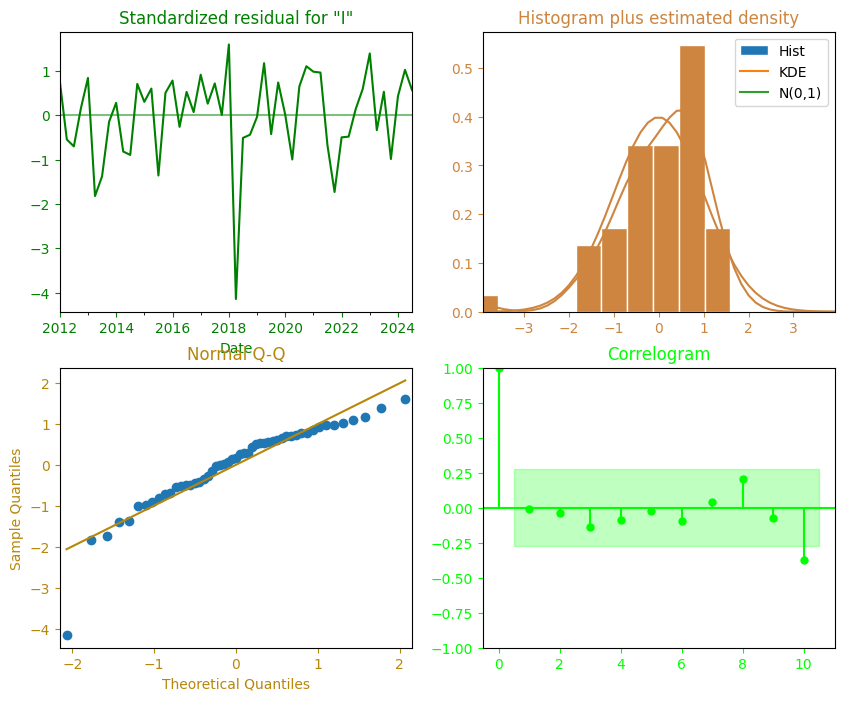

In [ ]:
# Residual diagnostics
fig = model_fit.plot_diagnostics(figsize=(10, 8))

# Access the subplots and set the colors manually
axes = fig.get_axes()

# Set specific colors for each subplot
colors = ['green', 'peru', 'darkgoldenrod', 'lime', 'black']

for ax, color in zip(axes, colors):
    # Set color for lines
    for line in ax.get_lines():
        line.set_color(color)

    for patch in ax.patches:
        patch.set_facecolor(color)

    # Change color of the scatter points (if any)
    if ax.collections:
        for collection in ax.collections:
            collection.set_color(color)

    # Set color for text and labels
    ax.title.set_color(color)
    ax.xaxis.label.set_color(color)
    ax.yaxis.label.set_color(color)
    ax.tick_params(axis='x', colors=color)
    ax.tick_params(axis='y', colors=color)

# Show the plot
plt.show()


In [ ]:
# Based on the residual diagnostics, we aim for a model with residuals that are:
# 1. Normally distributed (QQ plot approximates a straight line)
# 2. Uncorrelated (ACF plot has no significant spikes outside the confidence interval)
# 3. Constant variance (Standardized residual plot has no clear pattern)

# From the diagnostics, the ARIMA(2, 4, 2) model seems to show acceptable behavior for
# these criteria.
# The QQ plot shows a decent approximation of a normal distribution.
# The ACF plot shows some minor spikes at later lags, but mostly within confidence intervals.
# The standardized residuals plot appears to have a relatively constant variance without clear patterns.


# However, we can try further refinement based on specific concerns.
# If we observe strong autocorrelation in the residuals, we could explore increasing the order
# of the model (e.g., increasing 'q').
# If the variance of residuals is not constant, we could consider transformations on the data
# or more advanced modelling techniques.

# Therefore, considering the current diagnostics, ARIMA(2, 4, 2) appears as the best candidate.

# We can also try other models like ARIMA(0,4,2) or ARIMA(0,4,3) based on the AIC/BIC values and visual analysis of their residual diagnostics to determine if they present an improved model.

# Suggestion:
# The ARIMA(2, 4, 2) model appears to be a reasonable choice based on the residual diagnostics.

# Further steps:
# - Evaluate the model's forecast accuracy on a hold-out dataset.
# - Explore other model architectures like SARIMA if seasonality is present in the data.

# Note that the interpretation of the residual diagnostics can be subjective to some extent,
# and it's often beneficial to consider expert domain knowledge alongside statistical measures.

# Best suggested model: ARIMA(2, 4, 2)


In [ ]:
# Forecast next 5 steps
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-12-31    4888.018470
2025-03-31    5487.558918
2025-06-30    6094.102020
2025-09-30    6771.201217
2025-12-31    7483.990124
Freq: QE-DEC, Name: predicted_mean, dtype: float64


In [ ]:
from arch import arch_model

# Fit an EGARCH model to the data
egarch_model = arch_model(quarterly_data['Index'], vol='EGARCH', p=1, q=1)
egarch_model_fit = egarch_model.fit(disp='off')

# Print the model summary
print(egarch_model_fit.summary())

# Forecast conditional volatilities
forecasts = egarch_model_fit.forecast(horizon=5, method='simulation')
conditional_volatilities = forecasts.variance.values[-1]

# Print the forecasted conditional volatilities
print("\nForecasted Conditional Volatilities:")
print(conditional_volatilities)

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                  Index   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -414.850
Distribution:                  Normal   AIC:                           837.701
Method:            Maximum Likelihood   BIC:                           845.730
                                        No. Observations:                   55
Date:                Mon, Oct 28 2024   Df Residuals:                       54
Time:                        09:06:36   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          2258.4613      8.086    279.309      0.000 [2.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.987e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# Access the forecasted conditional volatilities from the EGARCH model
forecasted_volatilities = egarch_model_fit.forecast(horizon=5, method='simulation').variance.values[-1]

# Print the forecasted volatilities
print("\nForecasted Volatility:")
print(np.sqrt(forecasted_volatilities))


Forecasted Volatility:
[2389.28438137 2467.31650919 2541.92154077 2016.28670872 1836.72196497]


In [ ]:
#divide the quarterly data into 4, use 75% of the data for ARIMA modeling

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming quarterly_data is your DataFrame with the 'Index' column
train_size = int(len(quarterly_data) * 0.75)
train_data = quarterly_data[:train_size]
test_data = quarterly_data[train_size:]

# Define the p, d, and q parameters to test
p = d = q = range(0, 5)  # You can adjust the range as needed
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best models and their AIC and BIC
best_aic = float('inf')
best_bic = float('inf')
best_model_bic = None
best_pdq_aic = None
best_pdq_bic = None

# Iterate through all possible combinations of p, d, and q
for param in pdq:
    try:
        # Fit the ARIMA model
        model = ARIMA(train_data['Index'], order=param).fit()

        # Check for the lowest AIC
        if model.aic < best_aic:  # Finding the model with the lowest AIC
            best_aic = model.aic
            best_model_aic = model
            best_pdq_aic = param

        # Check for the lowest BIC
        if model.bic < best_bic:  # Finding the model with the lowest BIC
            best_bic = model.bic
            best_model_bic = model
            best_pdq_bic = param

        print(f"ARIMA{param} - AIC:{model.aic:.2f}, BIC:{model.bic:.2f}")

    except Exception as e:
        print(f"ARIMA{param} - Failed to fit. Error: {e}")

# Print the best models based on AIC and BIC
if best_pdq_aic is not None and best_pdq_bic is not None:
    print(f"\nBest ARIMA model based on AIC: ARIMA{best_pdq_aic} with AIC: {best_aic:.2f}")
    print(f"Best ARIMA model based on BIC: ARIMA{best_pdq_bic} with BIC: {best_bic:.2f}")
else:
    print("\nNo ARIMA model could be successfully fit.")

# Now, you can use the best_model_aic or best_model_bic to make forecasts on the test_data.


ARIMA(0, 0, 0) - AIC:638.60, BIC:642.03
ARIMA(0, 0, 1) - AIC:609.60, BIC:614.74


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 2) - AIC:583.46, BIC:590.31
ARIMA(0, 0, 3) - AIC:578.52, BIC:587.09
ARIMA(0, 0, 4) - AIC:575.02, BIC:585.30
ARIMA(0, 1, 0) - AIC:551.41, BIC:553.10
ARIMA(0, 1, 1) - AIC:553.32, BIC:556.69
ARIMA(0, 1, 2) - AIC:550.80, BIC:555.87
ARIMA(0, 1, 3) - AIC:551.73, BIC:558.49
ARIMA(0, 1, 4) - AIC:553.06, BIC:561.50
ARIMA(0, 2, 0) - AIC:562.51, BIC:564.17
ARIMA(0, 2, 1) - AIC:543.84, BIC:547.17
ARIMA(0, 2, 2) - AIC:545.71, BIC:550.70
ARIMA(0, 2, 3) - AIC:542.89, BIC:549.54
ARIMA(0, 2, 4) - AIC:543.94, BIC:552.26
ARIMA(0, 3, 0) - AIC:594.02, BIC:595.66


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 3, 1) - AIC:554.41, BIC:557.69
ARIMA(0, 3, 2) - AIC:540.33, BIC:545.25
ARIMA(0, 3, 3) - AIC:541.19, BIC:547.74


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 3, 4) - AIC:538.92, BIC:547.10
ARIMA(0, 4, 0) - AIC:627.05, BIC:628.66
ARIMA(0, 4, 1) - AIC:583.89, BIC:587.11
ARIMA(0, 4, 2) - AIC:549.76, BIC:554.60
ARIMA(0, 4, 3) - AIC:537.93, BIC:544.37


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 4, 4) - AIC:537.64, BIC:545.69
ARIMA(1, 0, 0) - AIC:569.37, BIC:574.52
ARIMA(1, 0, 1) - AIC:571.27, BIC:578.13
ARIMA(1, 0, 2) - AIC:567.79, BIC:576.36
ARIMA(1, 0, 3) - AIC:569.54, BIC:579.82
ARIMA(1, 0, 4) - AIC:569.35, BIC:581.34
ARIMA(1, 1, 0) - AIC:553.26, BIC:556.64
ARIMA(1, 1, 1) - AIC:554.47, BIC:559.54
ARIMA(1, 1, 2) - AIC:551.79, BIC:558.55
ARIMA(1, 1, 3) - AIC:554.04, BIC:562.48


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 4) - AIC:555.43, BIC:565.56
ARIMA(1, 2, 0) - AIC:544.22, BIC:547.55
ARIMA(1, 2, 1) - AIC:545.93, BIC:550.92
ARIMA(1, 2, 2) - AIC:547.40, BIC:554.06
ARIMA(1, 2, 3) - AIC:543.93, BIC:552.24


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 4) - AIC:545.73, BIC:555.71
ARIMA(1, 3, 0) - AIC:555.63, BIC:558.90
ARIMA(1, 3, 1) - AIC:537.39, BIC:542.30
ARIMA(1, 3, 2) - AIC:539.29, BIC:545.84
ARIMA(1, 3, 3) - AIC:541.07, BIC:549.26


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 3, 4) - AIC:539.85, BIC:549.67
ARIMA(1, 4, 0) - AIC:578.00, BIC:581.22
ARIMA(1, 4, 1) - AIC:546.95, BIC:551.79
ARIMA(1, 4, 2) - AIC:533.29, BIC:539.73
ARIMA(1, 4, 3) - AIC:535.29, BIC:543.34


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/s

ARIMA(1, 4, 4) - AIC:537.30, BIC:546.96
ARIMA(2, 0, 0) - AIC:570.98, BIC:577.84
ARIMA(2, 0, 1) - AIC:572.97, BIC:581.54
ARIMA(2, 0, 2) - AIC:569.17, BIC:579.45
ARIMA(2, 0, 3) - AIC:570.92, BIC:582.91
ARIMA(2, 0, 4) - AIC:571.20, BIC:584.90
ARIMA(2, 1, 0) - AIC:550.77, BIC:555.84
ARIMA(2, 1, 1) - AIC:552.36, BIC:559.12
ARIMA(2, 1, 2) - AIC:550.88, BIC:559.32


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:555.20, BIC:565.33


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

ARIMA(2, 1, 4) - AIC:547.75, BIC:559.58
ARIMA(2, 2, 0) - AIC:546.03, BIC:551.02
ARIMA(2, 2, 1) - AIC:542.69, BIC:549.35
ARIMA(2, 2, 2) - AIC:544.35, BIC:552.67


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 3) - AIC:543.13, BIC:553.11


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 4) - AIC:546.55, BIC:558.19
ARIMA(2, 3, 0) - AIC:549.65, BIC:554.56
ARIMA(2, 3, 1) - AIC:539.31, BIC:545.86
ARIMA(2, 3, 2) - AIC:541.38, BIC:549.57


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 3, 3) - AIC:543.19, BIC:553.02


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 3, 4) - AIC:542.62, BIC:554.08
ARIMA(2, 4, 0) - AIC:562.38, BIC:567.21
ARIMA(2, 4, 1) - AIC:541.77, BIC:548.22


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 4, 2) - AIC:535.29, BIC:543.34


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 4, 3) - AIC:537.55, BIC:547.22


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 4, 4) - AIC:538.65, BIC:549.93
ARIMA(3, 0, 0) - AIC:566.14, BIC:574.70
ARIMA(3, 0, 1) - AIC:568.13, BIC:578.42
ARIMA(3, 0, 2) - AIC:570.13, BIC:582.13
ARIMA(3, 0, 3) - AIC:572.08, BIC:585.79
ARIMA(3, 0, 4) - AIC:18.00, BIC:33.42
ARIMA(3, 1, 0) - AIC:552.10, BIC:558.85
ARIMA(3, 1, 1) - AIC:552.09, BIC:560.53


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:553.95, BIC:564.08


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 3) - AIC:554.89, BIC:566.72


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 4) - AIC:550.30, BIC:563.81
ARIMA(3, 2, 0) - AIC:547.66, BIC:554.31
ARIMA(3, 2, 1) - AIC:544.16, BIC:552.48
ARIMA(3, 2, 2) - AIC:546.70, BIC:556.68


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 2, 3) - AIC:544.59, BIC:556.24


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 4) - AIC:549.79, BIC:563.10
ARIMA(3, 3, 0) - AIC:548.70, BIC:555.25
ARIMA(3, 3, 1) - AIC:541.12, BIC:549.30
ARIMA(3, 3, 2) - AIC:543.31, BIC:553.14
ARIMA(3, 3, 3) - AIC:14.00, BIC:25.46


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 3, 4) - AIC:541.26, BIC:554.36
ARIMA(3, 4, 0) - AIC:557.20, BIC:563.64
ARIMA(3, 4, 1) - AIC:541.35, BIC:549.40


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 4, 2) - AIC:537.26, BIC:546.93


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 4, 3) - AIC:539.29, BIC:550.57


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 4, 4) - AIC:538.22, BIC:551.10
ARIMA(4, 0, 0) - AIC:568.13, BIC:578.42
ARIMA(4, 0, 1) - AIC:569.99, BIC:581.99


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

ARIMA(4, 0, 2) - AIC:570.26, BIC:583.97


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 3) - AIC:571.18, BIC:586.60


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 4) - AIC:572.46, BIC:589.60
ARIMA(4, 1, 0) - AIC:553.70, BIC:562.15
ARIMA(4, 1, 1) - AIC:554.01, BIC:564.14
ARIMA(4, 1, 2) - AIC:555.86, BIC:567.68


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/s

ARIMA(4, 1, 3) - AIC:556.31, BIC:569.83


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 4) - AIC:555.08, BIC:570.28
ARIMA(4, 2, 0) - AIC:549.00, BIC:557.31
ARIMA(4, 2, 1) - AIC:545.83, BIC:555.81


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 2) - AIC:547.69, BIC:559.33


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 2, 3) - AIC:546.09, BIC:559.40


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 4) - AIC:550.56, BIC:565.53
ARIMA(4, 3, 0) - AIC:546.90, BIC:555.09
ARIMA(4, 3, 1) - AIC:542.71, BIC:552.53


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 3, 2) - AIC:542.25, BIC:553.71


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 3, 3) - AIC:545.31, BIC:558.41


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 3, 4) - AIC:543.42, BIC:558.16
ARIMA(4, 4, 0) - AIC:550.22, BIC:558.28
ARIMA(4, 4, 1) - AIC:540.19, BIC:549.85


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 4, 2) - AIC:539.50, BIC:550.78


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 4, 3) - AIC:538.03, BIC:550.92
ARIMA(4, 4, 4) - AIC:539.90, BIC:554.40

Best ARIMA model based on AIC: ARIMA(3, 3, 3) with AIC: 14.00
Best ARIMA model based on BIC: ARIMA(3, 3, 3) with BIC: 25.46


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# prompt: use ARIMA(3,3,3) model for the train data above and show SARIMAX results

# Fit the ARIMA(3, 3, 3) model to the training data
try:
    model2 = ARIMA(train_data['Index'], order=(3, 3, 3)).fit()
    print(model2.summary())

    # You can also access specific statistics like AIC and BIC
    print(f"AIC: {model2.aic:.2f}")
    print(f"BIC: {model2.bic:.2f}")

    # Make predictions on the test data
    predictions = model2.predict(start=len(train_data), end=len(quarterly_data)-1)

    # Evaluate the model's performance (e.g., using RMSE)
    # ... (You can add your preferred evaluation metrics here)

except Exception as e:
    print(f"ARIMA(3, 3, 3) - Failed to fit. Error: {e}")



                               SARIMAX Results                                
Dep. Variable:                  Index   No. Observations:                   41
Model:                 ARIMA(3, 3, 3)   Log Likelihood                   0.000
Date:                Mon, 28 Oct 2024   AIC                             14.000
Time:                        09:12:16   BIC                             25.463
Sample:                    03-31-2011   HQIC                            18.078
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000   1.66e-05  -6.04e+04      0.000      -1.000      -1.000
ar.L2          1.0000   1.68e-05   5.94e+04      0.000       1.000       1.000
ar.L3          1.0000   3.41e-06   2.93e+05      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1431: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


In [ ]:
!pip install statsmodels
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen


                               SARIMAX Results                                
Dep. Variable:                  Index   No. Observations:                   55
Model:                 ARIMA(2, 4, 2)   Log Likelihood                -358.118
Date:                Mon, 28 Oct 2024   AIC                            726.236
Time:                        09:12:31   BIC                            735.895
Sample:                    03-31-2011   HQIC                           729.927
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5520      0.221     -2.496      0.013      -0.985      -0.119
ar.L2          0.0693      0.263      0.263      0.792      -0.447       0.586
ma.L1         -1.9906      0.194    -10.271      0.0

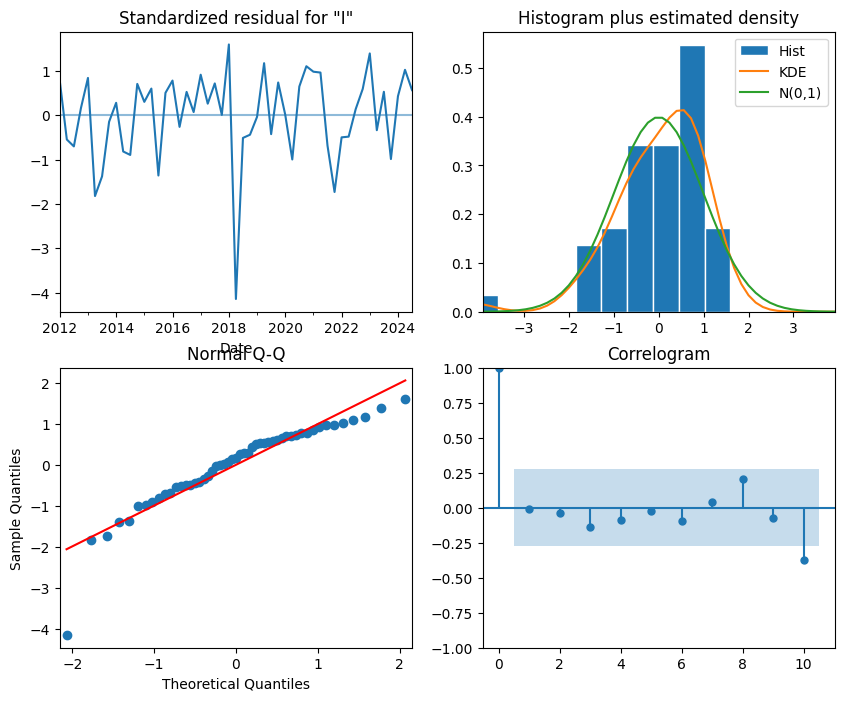

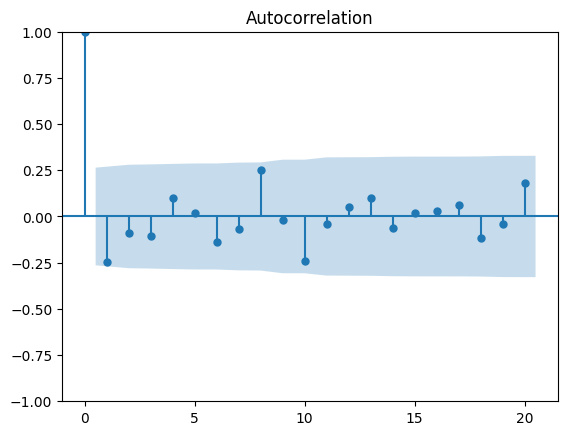

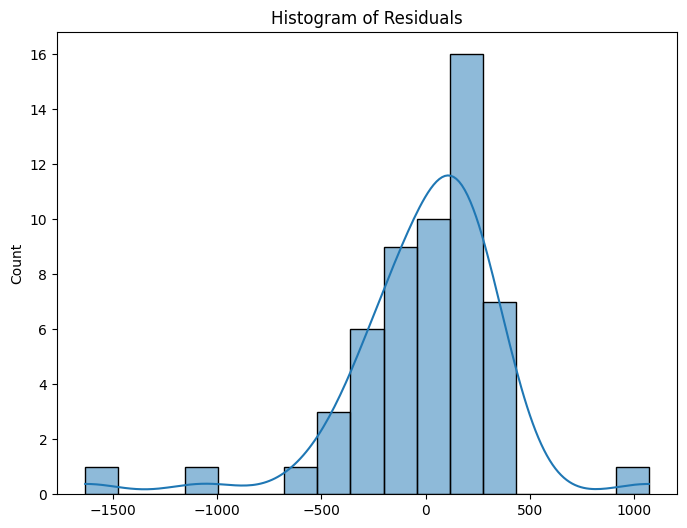

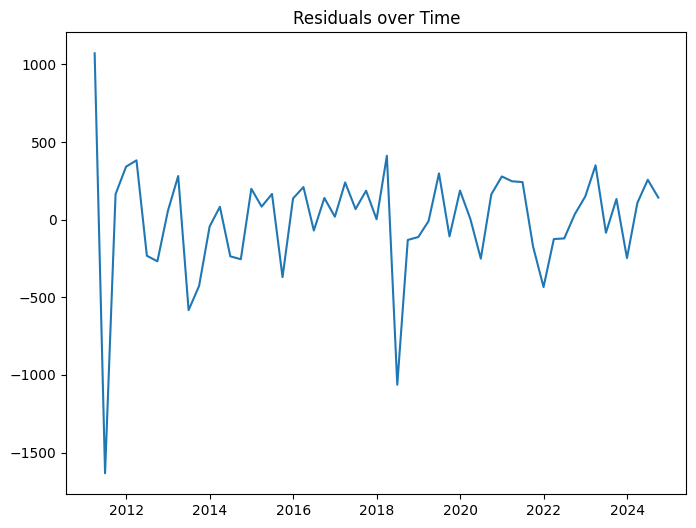

In [ ]:


# Already fitted the ARIMA(2, 4, 2) model and stored it in 'model_fit'

# Assess the model's performance
print(model_fit.summary())

# Residual diagnostics
fig = model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

# Check for autocorrelation in the residuals
acf_residuals = sm.acf(model_fit.resid)
plot_acf(model_fit.resid, lags=20)
plt.show()

# Check for normality of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(model_fit.resid, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# Check for heteroskedasticity in the residuals
plt.figure(figsize=(8, 6))
plt.plot(model_fit.resid)
plt.title('Residuals over Time')
plt.show()


# Based on the above outputs, you can assess the model's performance.
# Look for:
# - Low AIC and BIC values (indicates a good fit)
# - Residuals that are normally distributed, uncorrelated, and have constant variance (indicates a good model)
# - No significant autocorrelation in the residuals (indicates a good model)
# - No heteroskedasticity in the residuals (indicates a good model)

# If the model meets these criteria, it is likely a good model.
# If not, you may need to adjust the model's parameters or try a different model.


RMSE for test data: 213.25114715804196
RMSE for 5-step forecast: 2597.507081424978


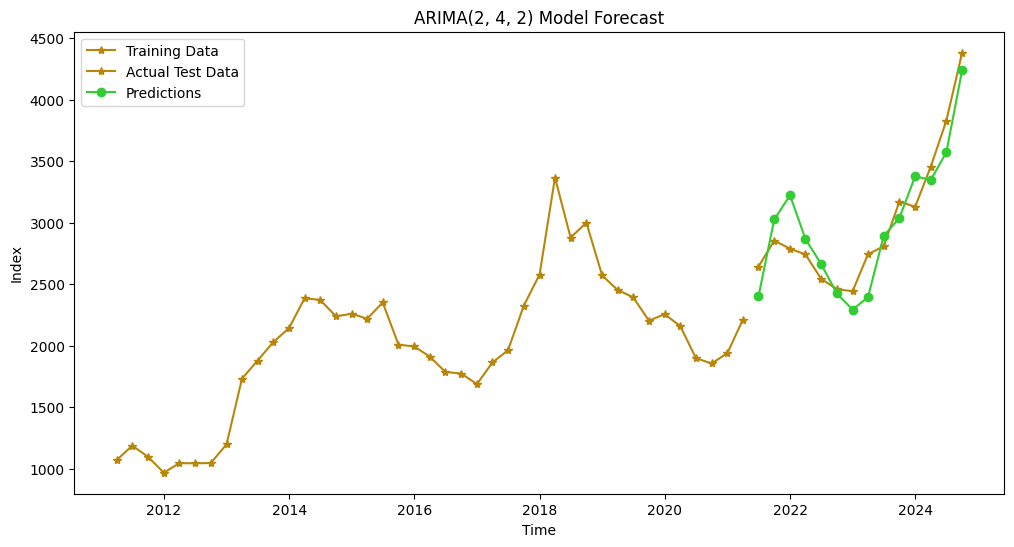

In [ ]:
# forecast the next 5 steps, and compare with the test, and compare the RMSE for test data and forecast without the dates, and plot

# Assuming you have already fitted the ARIMA(2, 4, 2) model and stored it in 'model_fit'
# And you have the test_data DataFrame

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(quarterly_data)-1)

# Forecast next 5 steps
forecast = model_fit.forecast(steps=5)

# Compare forecast with test data (without dates)
# Assuming 'Index' is the column containing the values in both test_data and forecast
rmse_test = np.sqrt(np.mean((test_data['Index'] - predictions)**2))
print(f"RMSE for test data: {rmse_test}")

# Forecast without dates
#forecast_values = forecast[0] # This line was causing the error, as it was only taking the first value of the forecast
forecast_values = forecast # Use the entire forecast object instead

# Compare forecast with test data (without dates, assuming you want to compare with the last 5 values of test_data)
rmse_forecast = np.sqrt(np.mean((test_data['Index'][-5:].values - forecast_values)**2))
print(f"RMSE for 5-step forecast: {rmse_forecast}")


# Plot the actual values, predictions, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Index'], label='Training Data', color='darkgoldenrod', marker='*')
plt.plot(test_data.index, test_data['Index'], label='Actual Test Data', color ='darkgoldenrod', marker='*')
plt.plot(test_data.index, predictions, label='Predictions', color='limegreen', marker='o')

plt.xlabel('Time')
plt.ylabel('Index')
plt.title('ARIMA(2, 4, 2) Model Forecast')
plt.legend()
plt.show()

<ipython-input-62-690438a44423>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_values = forecast[0]
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.398e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


RMSE for test data: 175.129316374341
RMSE for 5-step forecast: 1375.4902851884146


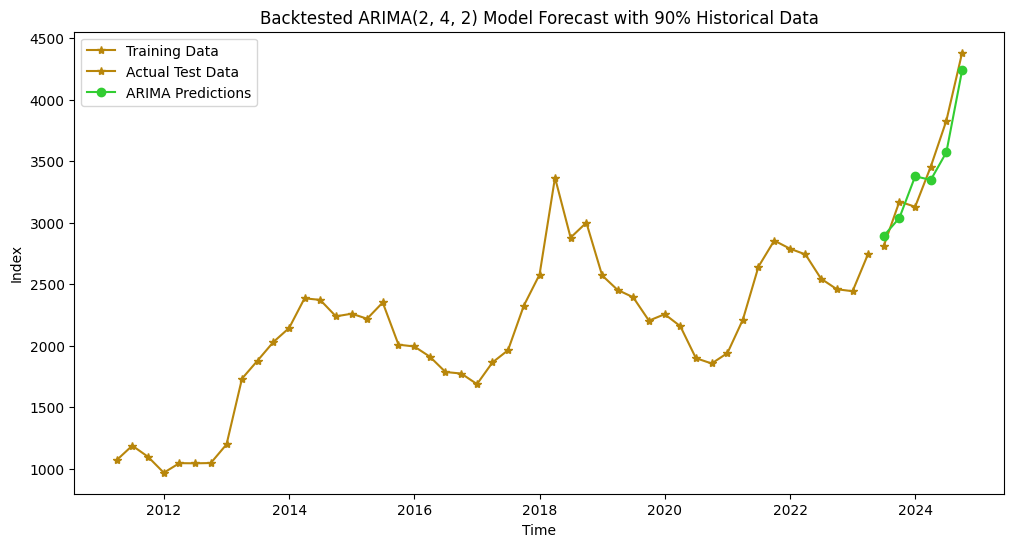

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -390.050
Distribution:                  Normal   AIC:                           788.100
Method:            Maximum Likelihood   BIC:                           796.129
                                        No. Observations:                   55
Date:                Mon, Oct 28 2024   Df Residuals:                       54
Time:                        10:57:06   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            18.5599     36.316      0.511      0.609 [-52.618, 89.73

In [ ]:
# Backtesting our Model

# Assuming quarterly_data is your DataFrame with the 'Index' column
train_size = int(len(quarterly_data) * 0.90)
train_data = quarterly_data[:train_size]
test_data = quarterly_data[train_size:]

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(quarterly_data)-1)

# Forecast next 5 steps
forecast = model_fit.forecast(steps=5)

# Extract the predicted values from the forecast object
forecast_values = forecast[0]

# Compare forecast with test data (without dates)
# Assuming 'Index' is the column containing the values in both test_data and forecast
rmse_test = np.sqrt(np.mean((test_data['Index'] - predictions)**2))
print(f"RMSE for test data: {rmse_test}")

# Compare forecast with test data (without dates, assuming you want to compare with the last 5 values of test_data)
rmse_forecast = np.sqrt(np.mean((test_data['Index'][-5:].values - forecast_values)**2))
print(f"RMSE for 5-step forecast: {rmse_forecast}")

# Fit a GARCH(1,1) model to the residuals of the ARIMA model
residuals = model_fit.resid
garch_model = arch_model(residuals, vol='GARCH', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Forecast conditional volatility using the GARCH model
garch_forecast = garch_fit.forecast(horizon=5)
forecasted_volatility = np.sqrt(garch_forecast.variance.values[-1])

# Plot the actual values, predictions, and forecasts, along with the forecasted volatility
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Index'], label='Training Data', color='darkgoldenrod', marker='*')
plt.plot(test_data.index, test_data['Index'], label='Actual Test Data', color='darkgoldenrod', marker='*')
plt.plot(test_data.index, predictions, label='ARIMA Predictions', color='limegreen', marker='o')

# Plot the forecasted volatility (you might need to adjust the y-axis scale)
#plt.plot(test_data.index[-5:], forecasted_volatility, label='Forecasted Volatility', color='red', marker='x')

plt.xlabel('Time')
plt.ylabel('Index')
plt.title('Backtested ARIMA(2, 4, 2) Model Forecast with 90% Historical Data')
plt.legend()
plt.show()

# Print the summary of the GARCH model
print(garch_fit.summary())

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.883e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-52-40a8ed570a58>:18: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_horizon = pd.date_range(start='2025-01-01', end='2025-12-31', freq='Q')


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                  Index   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -24712.6
Distribution:                  Normal   AIC:                           49433.1
Method:            Maximum Likelihood   BIC:                           49457.7
                                        No. Observations:                 3411
Date:                Mon, Oct 28 2024   Df Residuals:                     3410
Time:                        09:33:30   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          2221.8526      0.787   2822.460      0.000 [2.

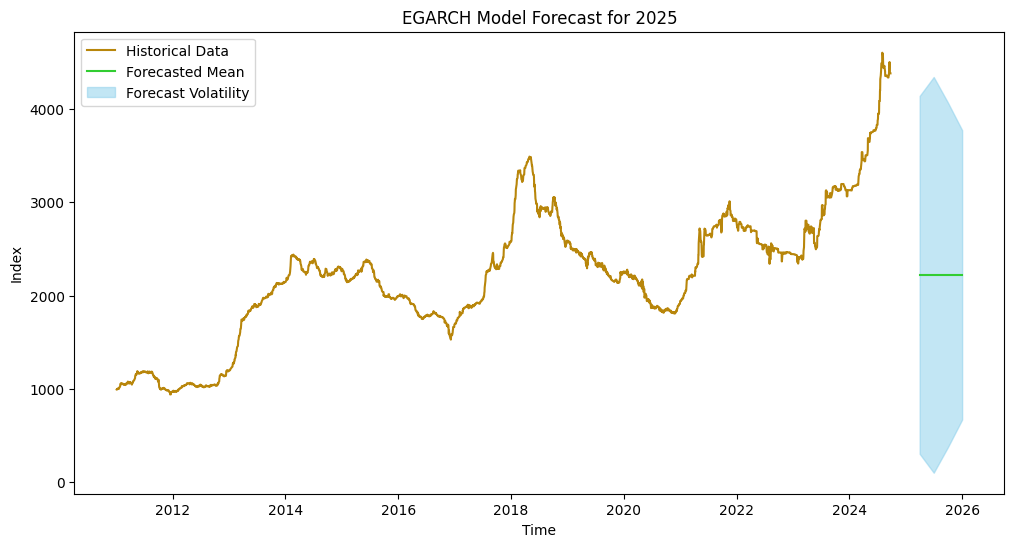

In [ ]:
# fit an egarch model on the df_ci['Index'] and forecast for the whole 2025


!pip install arch
import arch

# Fit an EGARCH model to the data
egarch_model = arch.arch_model(df_ci['Index'], vol='EGARCH', p=1, q=1)
egarch_model_fit = egarch_model.fit(disp='off')

# Print the model summary
print(egarch_model_fit.summary())

# Forecast for the whole 2025 (assuming you have a date index in your data)
# You might need to adapt the code below if your date index is different
forecast_horizon = pd.date_range(start='2025-01-01', end='2025-12-31', freq='Q')
forecasts = egarch_model_fit.forecast(horizon=len(forecast_horizon), method='simulation')
conditional_volatilities = forecasts.variance.values[-1]

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_ci.index, df_ci['Index'], label='Historical Data', color='darkgoldenrod')
# Access the forecasted values correctly, avoiding the extra dimension
plt.plot(forecast_horizon, forecasts.mean.iloc[-1].values, label='Forecasted Mean', color='limegreen')
plt.fill_between(forecast_horizon,
                 forecasts.mean.iloc[-1].values - np.sqrt(forecasts.variance.iloc[-1].values),
                 forecasts.mean.iloc[-1].values + np.sqrt(forecasts.variance.iloc[-1].values),
                 color='skyblue', alpha=0.5, label='Forecast Volatility')

plt.xlabel('Time')
plt.ylabel('Index')
plt.title('EGARCH Model Forecast for 2025')
plt.legend()
plt.show()

In [ ]:

# Calculate historical mean
historical_mean = df_ci['Index'].mean()

# Calculate mean for 2024 (assuming your data has a date index)
df_2024 = df_ci[df_ci.index.year == 2024]
mean_2024 = df_2024['Index'].mean() if not df_2024.empty else None

# Calculate forecasted mean for 2025 (assuming you have a forecast from your EGARCH model)
# Replace 'forecasts.mean.iloc[-1].values' with your actual forecasted mean for 2025
forecasted_mean_2025 = forecasts.mean.iloc[-1].values.mean() if forecasts is not None else None

# Print the results
print(f"Mean for 2024: {mean_2024}")
print(f"Forecasted Mean for 2025: {forecasted_mean_2025}")

# Calculate percentage differences
if historical_mean is not None and mean_2024 is not None:
  percentage_difference_2024 = ((mean_2024 - historical_mean) / historical_mean) * 100
  print(f"Percentage difference between historical mean and 2024 mean: {percentage_difference_2024:.2f}%")

if historical_mean is not None and forecasted_mean_2025 is not None:
  percentage_difference_2025 = ((forecasted_mean_2025 - historical_mean) / historical_mean) * 100
  print(f"Percentage difference between historical mean and 2025 forecasted mean: {percentage_difference_2025:.2f}%")


Mean for 2024: 3733.1794179894177
Forecasted Mean for 2025: 2221.852551160419
Percentage difference between historical mean and 2024 mean: 68.47%
Percentage difference between historical mean and 2025 forecasted mean: 0.27%


From the EGARCH(1,1) above, we realized that:
 - The mean difference between the historical data and 2024 account to about 68.47%
 - The mean difference with the historical and forecasted data for 2025 is about 0.27%

 - These results are quantitatively plausible because of the **behavioural switching (not volatility clustering)** in the periods of **2018**, **2021-2022**(*Poisson nature*) of the Composite Index over the years and recent declines learned. This is likely replication in fourth quarter of **2024 and 2025**.

 From our analysis, we realized YTD mean for 2024 is about 3373.1794 compared to the forecasted mean of 2221.85255; a 40.48% decline compared to 2024's average Index.

In [ ]:
# Assuming you have already fitted the EGARCH model and stored it in 'egarch_model_fit'
# And you have the forecast_horizon (quarterly dates for 2025)

forecasts = egarch_model_fit.forecast(horizon=len(forecast_horizon), method='simulation')

# Extract the upper bounds of the forecast for 2025
upper_bounds_2025 = forecasts.mean.iloc[-1].values + np.sqrt(forecasts.variance.iloc[-1].values)


# Print the upper bounds for each quarter in 2025
print("EGARCH Forecast for 2025 (Quarterly):")
for i, ub in enumerate(upper_bounds_2025):
    print(f"Q{i+1} 2025: {ub}")

# You can also plot these upper bounds if needed:
# plt.plot(forecast_horizon, upper_bounds_2025, label='Forecast Upper Bounds')

EGARCH Forecast for 2025 (Quarterly):
Q1 2025: 4140.203435289619
Q2 2025: 4585.030035359522
Q3 2025: 4523.971226145226
Q4 2025: 4178.209666333185


In [ ]:
# import forecast_df into an excel

forecast.to_excel('forecast_CI.xlsx')
files.download('forecast_CI.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Rescale data to make it easier for the optimizer to converge
df_ci['Index_rescaled'] = df_ci['Index'] / 1000  # Scale down the data

# Define and fit the EGARCH model on the rescaled data
egarch_model = arch_model(df_ci['Index_rescaled'], vol='EGARCH', p=1, q=1)
egarch_model_fit = egarch_model.fit(disp='off')

# Display the fitted model summary
print(egarch_model_fit.summary())


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:         Index_rescaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -941.217
Distribution:                  Normal   AIC:                           1890.43
Method:            Maximum Likelihood   BIC:                           1914.97
                                        No. Observations:                 3411
Date:                Mon, Oct 28 2024   Df Residuals:                     3410
Time:                        15:15:08   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.2500  1.329e-03   1693.364      0.000 [  2.247,  2.25

In [ ]:
import numpy as np
from arch import arch_model
import itertools

# Define the p, o, and q parameters to test
p = o = q = range(1, 10)
pq_combinations = list(itertools.product(p, o, q))

# Initialize variables to store the best models and their AIC and BIC
best_aic = float('inf')
best_bic = float('inf')
best_model_aic = None
best_model_bic = None
best_params_aic = None
best_params_bic = None

# Loop through all possible combinations of p, o, and q
for param in pq_combinations:
    try:
        # Fit the EGARCH model
        model = arch_model(df_ci['Index_rescaled'], vol='EGARCH', p=param[0], o=param[1], q=param[2])
        model_fit = model.fit(disp='off')

        # Check for the lowest AIC
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_model_aic = model_fit
            best_params_aic = param

        # Check for the lowest BIC
        if model_fit.bic < best_bic:
            best_bic = model_fit.bic
            best_model_bic = model_fit
            best_params_bic = param

        print(f"EGARCH{param} - AIC: {model_fit.aic:.2f}, BIC: {model_fit.bic:.2f}")

    except Exception as e:
        print(f"EGARCH{param} - Failed to fit. Error: {e}")

# Print the best models based on AIC and BIC
if best_params_aic is not None and best_params_bic is not None:
    print(f"\nBest EGARCH model based on AIC: EGARCH{best_params_aic} with AIC: {best_aic:.2f}")
    print(f"Best EGARCH model based on BIC: EGARCH{best_params_bic} with BIC: {best_bic:.2f}")
else:
    print("\nNo EGARCH model could be successfully fit.")


EGARCH(1, 1, 1) - AIC: 1873.66, BIC: 1904.34
EGARCH(1, 1, 2) - AIC: 1892.92, BIC: 1929.73
EGARCH(1, 1, 3) - AIC: 1876.74, BIC: 1919.68
EGARCH(1, 1, 4) - AIC: 1878.42, BIC: 1927.50
EGARCH(1, 1, 5) - AIC: 1897.93, BIC: 1953.14
EGARCH(1, 1, 6) - AIC: 1882.42, BIC: 1943.77
EGARCH(1, 1, 7) - AIC: 1888.07, BIC: 1955.55
EGARCH(1, 1, 8) - AIC: 1903.11, BIC: 1976.72
EGARCH(1, 1, 9) - AIC: 1888.42, BIC: 1968.18
EGARCH(1, 2, 1) - AIC: 1894.33, BIC: 1931.14
EGARCH(1, 2, 2) - AIC: 1884.25, BIC: 1927.19
EGARCH(1, 2, 3) - AIC: 1878.71, BIC: 1927.79
EGARCH(1, 2, 4) - AIC: 1880.40, BIC: 1935.61
EGARCH(1, 2, 5) - AIC: 1899.86, BIC: 1961.21
EGARCH(1, 2, 6) - AIC: 1884.40, BIC: 1951.88
EGARCH(1, 2, 7) - AIC: 1903.16, BIC: 1976.78
EGARCH(1, 2, 8) - AIC: 1905.10, BIC: 1984.85
EGARCH(1, 2, 9) - AIC: 1890.40, BIC: 1976.28
EGARCH(1, 3, 1) - AIC: 1877.37, BIC: 1920.31
EGARCH(1, 3, 2) - AIC: 1938.04, BIC: 1987.12
EGARCH(1, 3, 3) - AIC: 1885.15, BIC: 1940.36
EGARCH(1, 3, 4) - AIC: 1882.35, BIC: 1943.70
EGARCH(1, 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(2, 3, 8) - AIC: 32205220965368.75, BIC: 32205220965460.77
EGARCH(2, 3, 9) - AIC: 1909.65, BIC: 2007.81
EGARCH(2, 4, 1) - AIC: 1882.79, BIC: 1938.00
EGARCH(2, 4, 2) - AIC: 1884.40, BIC: 1945.75
EGARCH(2, 4, 3) - AIC: 1884.40, BIC: 1951.88
EGARCH(2, 4, 4) - AIC: 1883.76, BIC: 1957.37
EGARCH(2, 4, 5) - AIC: 1885.76, BIC: 1965.51
EGARCH(2, 4, 6) - AIC: 1887.76, BIC: 1973.64
EGARCH(2, 4, 7) - AIC: 1889.76, BIC: 1981.78
EGARCH(2, 4, 8) - AIC: 1890.41, BIC: 1988.57
EGARCH(2, 4, 9) - AIC: 1893.51, BIC: 1997.80
EGARCH(2, 5, 1) - AIC: 1878.63, BIC: 1939.98
EGARCH(2, 5, 2) - AIC: 1884.35, BIC: 1951.83
EGARCH(2, 5, 3) - AIC: 1885.62, BIC: 1959.24
EGARCH(2, 5, 4) - AIC: 1884.19, BIC: 1963.94
EGARCH(2, 5, 5) - AIC: 1904.27, BIC: 1990.16
EGARCH(2, 5, 6) - AIC: 1888.19, BIC: 1980.21
EGARCH(2, 5, 7) - AIC: 1890.19, BIC: 1988.35
EGARCH(2, 5, 8) - AIC: 1891.77, BIC: 1996.06
EGARCH(2, 5, 9) - AIC: 1893.90, BIC: 2004.33
EGARCH(2, 6, 1) - AIC: 1940.93, BIC: 2008.41
EGARCH(2, 6, 2) - AIC: 1942.93, BIC

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(3, 6, 7) - AIC: 1893.73, BIC: 2004.15
EGARCH(3, 6, 8) - AIC: 1886.92, BIC: 2003.48
EGARCH(3, 6, 9) - AIC: 1897.35, BIC: 2020.05
EGARCH(3, 7, 1) - AIC: 1886.64, BIC: 1966.39
EGARCH(3, 7, 2) - AIC: 1943.95, BIC: 2029.83


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(3, 7, 3) - AIC: 2326.77, BIC: 2418.79
EGARCH(3, 7, 4) - AIC: 1889.58, BIC: 1987.74
EGARCH(3, 7, 5) - AIC: 1880.07, BIC: 1984.36
EGARCH(3, 7, 6) - AIC: 1882.07, BIC: 1992.50
EGARCH(3, 7, 7) - AIC: 1953.95, BIC: 2070.51
EGARCH(3, 7, 8) - AIC: 1897.15, BIC: 2019.84
EGARCH(3, 7, 9) - AIC: 1888.07, BIC: 2016.90
EGARCH(3, 8, 1) - AIC: 1885.77, BIC: 1971.65
EGARCH(3, 8, 2) - AIC: 1890.54, BIC: 1982.56
EGARCH(3, 8, 3) - AIC: 1940.28, BIC: 2038.43
EGARCH(3, 8, 4) - AIC: 1890.42, BIC: 1994.71
EGARCH(3, 8, 5) - AIC: 1892.42, BIC: 2002.85
EGARCH(3, 8, 6) - AIC: 1894.42, BIC: 2010.98
EGARCH(3, 8, 7) - AIC: 1896.19, BIC: 2018.89
EGARCH(3, 8, 8) - AIC: 1888.03, BIC: 2016.86
EGARCH(3, 8, 9) - AIC: 1890.03, BIC: 2025.00
EGARCH(3, 9, 1) - AIC: 1881.90, BIC: 1973.92
EGARCH(3, 9, 2) - AIC: 1883.90, BIC: 1982.05
EGARCH(3, 9, 3) - AIC: 1889.37, BIC: 1993.66
EGARCH(3, 9, 4) - AIC: 1883.84, BIC: 1994.27
EGARCH(3, 9, 5) - AIC: 1888.33, BIC: 2004.89
EGARCH(3, 9, 6) - AIC: 1890.31, BIC: 2013.00
EGARCH(3, 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(4, 1, 9) - AIC: 8673.44, BIC: 8771.60
EGARCH(4, 2, 1) - AIC: 1936.92, BIC: 1992.14
EGARCH(4, 2, 2) - AIC: 1879.43, BIC: 1940.78
EGARCH(4, 2, 3) - AIC: 1942.11, BIC: 2009.59
EGARCH(4, 2, 4) - AIC: 1886.93, BIC: 1960.55
EGARCH(4, 2, 5) - AIC: 1887.04, BIC: 1966.80
EGARCH(4, 2, 6) - AIC: 1891.21, BIC: 1977.10
EGARCH(4, 2, 7) - AIC: 1893.21, BIC: 1985.23
EGARCH(4, 2, 8) - AIC: 1950.82, BIC: 2048.98


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(4, 2, 9) - AIC: 4778.67, BIC: 4882.96
EGARCH(4, 3, 1) - AIC: 1938.76, BIC: 2000.10
EGARCH(4, 3, 2) - AIC: 1881.43, BIC: 1948.92
EGARCH(4, 3, 3) - AIC: 1886.35, BIC: 1959.97
EGARCH(4, 3, 4) - AIC: 1945.63, BIC: 2025.38
EGARCH(4, 3, 5) - AIC: 1944.10, BIC: 2029.99
EGARCH(4, 3, 6) - AIC: 1890.09, BIC: 1982.11
EGARCH(4, 3, 7) - AIC: 1942.35, BIC: 2040.50
EGARCH(4, 3, 8) - AIC: 1893.78, BIC: 1998.07
EGARCH(4, 3, 9) - AIC: 1890.69, BIC: 2001.11
EGARCH(4, 4, 1) - AIC: 1936.96, BIC: 2004.45
EGARCH(4, 4, 2) - AIC: 1902.90, BIC: 1976.52
EGARCH(4, 4, 3) - AIC: 1884.93, BIC: 1964.68
EGARCH(4, 4, 4) - AIC: 2143.54, BIC: 2229.42
EGARCH(4, 4, 5) - AIC: 1888.92, BIC: 1980.94
EGARCH(4, 4, 6) - AIC: 1892.03, BIC: 1990.19
EGARCH(4, 4, 7) - AIC: 1890.99, BIC: 1995.28
EGARCH(4, 4, 8) - AIC: 1894.66, BIC: 2005.09
EGARCH(4, 4, 9) - AIC: 1896.66, BIC: 2013.22
EGARCH(4, 5, 1) - AIC: 1938.59, BIC: 2012.21
EGARCH(4, 5, 2) - AIC: 1884.84, BIC: 1964.59
EGARCH(4, 5, 3) - AIC: 1881.61, BIC: 1967.49
EGARCH(4, 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(4, 7, 8) - AIC: 1897.60, BIC: 2026.43
EGARCH(4, 7, 9) - AIC: 1959.80, BIC: 2094.76
EGARCH(4, 8, 1) - AIC: 1902.22, BIC: 1994.24
EGARCH(4, 8, 2) - AIC: 1904.22, BIC: 2002.38
EGARCH(4, 8, 3) - AIC: 1884.32, BIC: 1988.61
EGARCH(4, 8, 4) - AIC: 1949.75, BIC: 2060.18
EGARCH(4, 8, 5) - AIC: 1951.75, BIC: 2068.31
EGARCH(4, 8, 6) - AIC: 1896.33, BIC: 2019.02
EGARCH(4, 8, 7) - AIC: 1957.62, BIC: 2086.45
EGARCH(4, 8, 8) - AIC: 1900.17, BIC: 2035.13
EGARCH(4, 8, 9) - AIC: 2028.11, BIC: 2169.21
EGARCH(4, 9, 1) - AIC: 1881.08, BIC: 1979.24
EGARCH(4, 9, 2) - AIC: 1890.17, BIC: 1994.46
EGARCH(4, 9, 3) - AIC: 1888.51, BIC: 1998.94
EGARCH(4, 9, 4) - AIC: 1944.35, BIC: 2060.91
EGARCH(4, 9, 5) - AIC: 1946.35, BIC: 2069.04
EGARCH(4, 9, 6) - AIC: 1948.35, BIC: 2077.18
EGARCH(4, 9, 7) - AIC: 1894.04, BIC: 2029.01


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(4, 9, 8) - AIC: 1887.89, BIC: 2028.99
EGARCH(4, 9, 9) - AIC: 1897.55, BIC: 2044.78
EGARCH(5, 1, 1) - AIC: 1939.43, BIC: 1994.65
EGARCH(5, 1, 2) - AIC: 1874.89, BIC: 1936.24
EGARCH(5, 1, 3) - AIC: 1902.84, BIC: 1970.32
EGARCH(5, 1, 4) - AIC: 1878.89, BIC: 1952.51
EGARCH(5, 1, 5) - AIC: 1947.32, BIC: 2027.08
EGARCH(5, 1, 6) - AIC: 1948.96, BIC: 2034.84
EGARCH(5, 1, 7) - AIC: 1950.91, BIC: 2042.93
EGARCH(5, 1, 8) - AIC: 1886.54, BIC: 1984.70
EGARCH(5, 1, 9) - AIC: 1898.94, BIC: 2003.24
EGARCH(5, 2, 1) - AIC: 1874.79, BIC: 1936.14
EGARCH(5, 2, 2) - AIC: 1876.76, BIC: 1944.24
EGARCH(5, 2, 3) - AIC: 1878.76, BIC: 1952.38
EGARCH(5, 2, 4) - AIC: 1893.00, BIC: 1972.75
EGARCH(5, 2, 5) - AIC: 1882.76, BIC: 1968.64
EGARCH(5, 2, 6) - AIC: 1949.11, BIC: 2041.14
EGARCH(5, 2, 7) - AIC: 1950.40, BIC: 2048.56
EGARCH(5, 2, 8) - AIC: 1949.81, BIC: 2054.10
EGARCH(5, 2, 9) - AIC: 1899.04, BIC: 2009.47
EGARCH(5, 3, 1) - AIC: 1876.63, BIC: 1944.12
EGARCH(5, 3, 2) - AIC: 1904.02, BIC: 1977.64
EGARCH(5, 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(5, 4, 7) - AIC: 1942.02, BIC: 2052.44
EGARCH(5, 4, 8) - AIC: 1893.63, BIC: 2010.19
EGARCH(5, 4, 9) - AIC: 1894.18, BIC: 2016.88
EGARCH(5, 5, 1) - AIC: 1878.36, BIC: 1958.11
EGARCH(5, 5, 2) - AIC: 1882.17, BIC: 1968.06
EGARCH(5, 5, 3) - AIC: 1884.14, BIC: 1976.16
EGARCH(5, 5, 4) - AIC: 1885.36, BIC: 1983.52
EGARCH(5, 5, 5) - AIC: 1887.36, BIC: 1991.65
EGARCH(5, 5, 6) - AIC: 1887.19, BIC: 1997.61
EGARCH(5, 5, 7) - AIC: 1888.62, BIC: 2005.18
EGARCH(5, 5, 8) - AIC: 1896.65, BIC: 2019.34
EGARCH(5, 5, 9) - AIC: 1895.92, BIC: 2024.75
EGARCH(5, 6, 1) - AIC: 1944.73, BIC: 2030.62
EGARCH(5, 6, 2) - AIC: 1883.63, BIC: 1975.65
EGARCH(5, 6, 3) - AIC: 1904.18, BIC: 2002.34
EGARCH(5, 6, 4) - AIC: 1887.56, BIC: 1991.85
EGARCH(5, 6, 5) - AIC: 1889.56, BIC: 1999.99
EGARCH(5, 6, 6) - AIC: 1951.71, BIC: 2068.27
EGARCH(5, 6, 7) - AIC: 1888.63, BIC: 2011.33
EGARCH(5, 6, 8) - AIC: 1895.32, BIC: 2024.15
EGARCH(5, 6, 9) - AIC: 1897.32, BIC: 2032.28
EGARCH(5, 7, 1) - AIC: 1902.05, BIC: 1994.07
EGARCH(5, 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(5, 7, 6) - AIC: 1955.26, BIC: 2077.95
EGARCH(5, 7, 7) - AIC: 1898.00, BIC: 2026.83
EGARCH(5, 7, 8) - AIC: 1896.92, BIC: 2031.89
EGARCH(5, 7, 9) - AIC: 1898.92, BIC: 2040.02
EGARCH(5, 8, 1) - AIC: 1887.72, BIC: 1985.88
EGARCH(5, 8, 2) - AIC: 1887.27, BIC: 1991.56
EGARCH(5, 8, 3) - AIC: 1889.26, BIC: 1999.69
EGARCH(5, 8, 4) - AIC: 2149.04, BIC: 2265.60
EGARCH(5, 8, 5) - AIC: 1883.24, BIC: 2005.93
EGARCH(5, 8, 6) - AIC: 1957.32, BIC: 2086.15
EGARCH(5, 8, 7) - AIC: 1897.14, BIC: 2032.11
EGARCH(5, 8, 8) - AIC: 1898.93, BIC: 2040.03
EGARCH(5, 8, 9) - AIC: 1900.92, BIC: 2048.16
EGARCH(5, 9, 1) - AIC: 1939.69, BIC: 2043.98
EGARCH(5, 9, 2) - AIC: 1887.98, BIC: 1998.41
EGARCH(5, 9, 3) - AIC: 1907.76, BIC: 2024.32
EGARCH(5, 9, 4) - AIC: 1885.02, BIC: 2007.71
EGARCH(5, 9, 5) - AIC: 1892.00, BIC: 2020.83
EGARCH(5, 9, 6) - AIC: 1949.69, BIC: 2084.66
EGARCH(5, 9, 7) - AIC: 1951.69, BIC: 2092.79
EGARCH(5, 9, 8) - AIC: 2016.92, BIC: 2164.15


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(5, 9, 9) - AIC: 1900.51, BIC: 2053.88
EGARCH(6, 1, 1) - AIC: 1940.69, BIC: 2002.04
EGARCH(6, 1, 2) - AIC: 1942.53, BIC: 2010.02
EGARCH(6, 1, 3) - AIC: 1901.12, BIC: 1974.74
EGARCH(6, 1, 4) - AIC: 1880.88, BIC: 1960.63
EGARCH(6, 1, 5) - AIC: 1905.12, BIC: 1991.01
EGARCH(6, 1, 6) - AIC: 1884.84, BIC: 1976.86
EGARCH(6, 1, 7) - AIC: 1909.12, BIC: 2007.28
EGARCH(6, 1, 8) - AIC: 1942.66, BIC: 2046.95
EGARCH(6, 1, 9) - AIC: 1890.61, BIC: 2001.04
EGARCH(6, 2, 1) - AIC: 1941.45, BIC: 2008.93
EGARCH(6, 2, 2) - AIC: 1883.66, BIC: 1957.28
EGARCH(6, 2, 3) - AIC: 1903.11, BIC: 1982.86
EGARCH(6, 2, 4) - AIC: 1882.71, BIC: 1968.60
EGARCH(6, 2, 5) - AIC: 1907.11, BIC: 1999.13
EGARCH(6, 2, 6) - AIC: 1909.11, BIC: 2007.26
EGARCH(6, 2, 7) - AIC: 1893.66, BIC: 1997.95
EGARCH(6, 2, 8) - AIC: 1895.66, BIC: 2006.09
EGARCH(6, 2, 9) - AIC: 1903.93, BIC: 2020.50
EGARCH(6, 3, 1) - AIC: 1934.78, BIC: 2008.40
EGARCH(6, 3, 2) - AIC: 1934.00, BIC: 2013.76
EGARCH(6, 3, 3) - AIC: 1936.25, BIC: 2022.13
EGARCH(6, 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(6, 5, 7) - AIC: 1954.26, BIC: 2076.96
EGARCH(6, 5, 8) - AIC: 1897.25, BIC: 2026.08
EGARCH(6, 5, 9) - AIC: 1944.74, BIC: 2079.71
EGARCH(6, 6, 1) - AIC: 1888.46, BIC: 1980.48
EGARCH(6, 6, 2) - AIC: 1882.67, BIC: 1980.83
EGARCH(6, 6, 3) - AIC: 1904.90, BIC: 2009.19
EGARCH(6, 6, 4) - AIC: 1889.56, BIC: 1999.98
EGARCH(6, 6, 5) - AIC: 1887.04, BIC: 2003.60
EGARCH(6, 6, 6) - AIC: 1910.90, BIC: 2033.60
EGARCH(6, 6, 7) - AIC: 1947.02, BIC: 2075.85
EGARCH(6, 6, 8) - AIC: 1897.15, BIC: 2032.11
EGARCH(6, 6, 9) - AIC: 1894.55, BIC: 2035.65
EGARCH(6, 7, 1) - AIC: 1890.44, BIC: 1988.60
EGARCH(6, 7, 2) - AIC: 1883.66, BIC: 1987.95
EGARCH(6, 7, 3) - AIC: 1938.05, BIC: 2048.47
EGARCH(6, 7, 4) - AIC: 1885.52, BIC: 2002.08
EGARCH(6, 7, 5) - AIC: 1893.23, BIC: 2015.93
EGARCH(6, 7, 6) - AIC: 1885.35, BIC: 2014.18


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(6, 7, 7) - AIC: 1948.60, BIC: 2083.57
EGARCH(6, 7, 8) - AIC: 1898.73, BIC: 2039.83
EGARCH(6, 7, 9) - AIC: 1900.73, BIC: 2047.97
EGARCH(6, 8, 1) - AIC: 1889.60, BIC: 1993.90
EGARCH(6, 8, 2) - AIC: 1883.54, BIC: 1993.96
EGARCH(6, 8, 3) - AIC: 1891.26, BIC: 2007.82
EGARCH(6, 8, 4) - AIC: 1909.92, BIC: 2032.62
EGARCH(6, 8, 5) - AIC: 1912.10, BIC: 2040.93


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(6, 8, 6) - AIC: 1924.88, BIC: 2059.84
EGARCH(6, 8, 7) - AIC: 1899.03, BIC: 2040.13
EGARCH(6, 8, 8) - AIC: 1900.73, BIC: 2047.97
EGARCH(6, 8, 9) - AIC: 1902.73, BIC: 2056.10
EGARCH(6, 9, 1) - AIC: 1888.64, BIC: 1999.07
EGARCH(6, 9, 2) - AIC: 1889.51, BIC: 2006.07
EGARCH(6, 9, 3) - AIC: 1908.44, BIC: 2031.13
EGARCH(6, 9, 4) - AIC: 1891.94, BIC: 2020.77
EGARCH(6, 9, 5) - AIC: 1912.15, BIC: 2047.12


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(6, 9, 6) - AIC: 1926.00, BIC: 2067.10
EGARCH(6, 9, 7) - AIC: 1897.48, BIC: 2044.72
EGARCH(6, 9, 8) - AIC: 1916.57, BIC: 2069.94
EGARCH(6, 9, 9) - AIC: 1918.57, BIC: 2078.07
EGARCH(7, 1, 1) - AIC: 1935.12, BIC: 2002.60
EGARCH(7, 1, 2) - AIC: 1891.44, BIC: 1965.06
EGARCH(7, 1, 3) - AIC: 1902.84, BIC: 1982.60
EGARCH(7, 1, 4) - AIC: 1882.87, BIC: 1968.75
EGARCH(7, 1, 5) - AIC: 1884.87, BIC: 1976.89
EGARCH(7, 1, 6) - AIC: 1886.79, BIC: 1984.95
EGARCH(7, 1, 7) - AIC: 1888.38, BIC: 1992.67
EGARCH(7, 1, 8) - AIC: 1890.28, BIC: 2000.70
EGARCH(7, 1, 9) - AIC: 1892.67, BIC: 2009.23
EGARCH(7, 2, 1) - AIC: 1883.67, BIC: 1957.29
EGARCH(7, 2, 2) - AIC: 1936.04, BIC: 2015.80
EGARCH(7, 2, 3) - AIC: 1882.71, BIC: 1968.60
EGARCH(7, 2, 4) - AIC: 1897.44, BIC: 1989.46
EGARCH(7, 2, 5) - AIC: 1899.44, BIC: 1997.60
EGARCH(7, 2, 6) - AIC: 1901.44, BIC: 2005.73
EGARCH(7, 2, 7) - AIC: 1903.44, BIC: 2013.87
EGARCH(7, 2, 8) - AIC: 1897.47, BIC: 2014.03


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(7, 2, 9) - AIC: 1904.08, BIC: 2026.78
EGARCH(7, 3, 1) - AIC: 2022.56, BIC: 2102.31
EGARCH(7, 3, 2) - AIC: 1882.56, BIC: 1968.45
EGARCH(7, 3, 3) - AIC: 1892.15, BIC: 1984.17
EGARCH(7, 3, 4) - AIC: 1939.83, BIC: 2037.99
EGARCH(7, 3, 5) - AIC: 1887.54, BIC: 1991.83
EGARCH(7, 3, 6) - AIC: 1890.54, BIC: 2000.96


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(7, 3, 7) - AIC: 1895.19, BIC: 2011.75
EGARCH(7, 3, 8) - AIC: 1894.03, BIC: 2016.72
EGARCH(7, 3, 9) - AIC: 1959.65, BIC: 2088.48
EGARCH(7, 4, 1) - AIC: 2023.33, BIC: 2109.22
EGARCH(7, 4, 2) - AIC: 1937.08, BIC: 2029.10
EGARCH(7, 4, 3) - AIC: 1939.08, BIC: 2037.24
EGARCH(7, 4, 4) - AIC: 1905.23, BIC: 2009.52
EGARCH(7, 4, 5) - AIC: 1889.21, BIC: 1999.64
EGARCH(7, 4, 6) - AIC: 1892.42, BIC: 2008.98
EGARCH(7, 4, 7) - AIC: 1947.04, BIC: 2069.74
EGARCH(7, 4, 8) - AIC: 1913.02, BIC: 2041.85
EGARCH(7, 4, 9) - AIC: 1897.82, BIC: 2032.78
EGARCH(7, 5, 1) - AIC: 1880.09, BIC: 1972.12
EGARCH(7, 5, 2) - AIC: 1916.53, BIC: 2014.68
EGARCH(7, 5, 3) - AIC: 1887.71, BIC: 1992.00
EGARCH(7, 5, 4) - AIC: 1906.85, BIC: 2017.28
EGARCH(7, 5, 5) - AIC: 1890.88, BIC: 2007.44
EGARCH(7, 5, 6) - AIC: 1946.95, BIC: 2069.65


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(7, 5, 7) - AIC: 1946.97, BIC: 2075.80
EGARCH(7, 5, 8) - AIC: 1896.88, BIC: 2031.85
EGARCH(7, 5, 9) - AIC: 1898.83, BIC: 2039.93
EGARCH(7, 6, 1) - AIC: 1885.62, BIC: 1983.78
EGARCH(7, 6, 2) - AIC: 1884.33, BIC: 1988.63
EGARCH(7, 6, 3) - AIC: 1889.62, BIC: 2000.05
EGARCH(7, 6, 4) - AIC: 1890.85, BIC: 2007.41


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(7, 6, 5) - AIC: 1892.85, BIC: 2015.54
EGARCH(7, 6, 6) - AIC: 1948.99, BIC: 2077.82
EGARCH(7, 6, 7) - AIC: 1892.60, BIC: 2027.56
EGARCH(7, 6, 8) - AIC: 1915.79, BIC: 2056.89
EGARCH(7, 6, 9) - AIC: 1900.89, BIC: 2048.13
EGARCH(7, 7, 1) - AIC: 1937.47, BIC: 2041.76
EGARCH(7, 7, 2) - AIC: 1889.28, BIC: 1999.71
EGARCH(7, 7, 3) - AIC: 1939.64, BIC: 2056.20
EGARCH(7, 7, 4) - AIC: 1892.43, BIC: 2015.12
EGARCH(7, 7, 5) - AIC: 1894.43, BIC: 2023.26
EGARCH(7, 7, 6) - AIC: 1950.97, BIC: 2085.94
EGARCH(7, 7, 7) - AIC: 1915.78, BIC: 2056.88
EGARCH(7, 7, 8) - AIC: 1900.29, BIC: 2047.52
EGARCH(7, 7, 9) - AIC: 1901.45, BIC: 2054.82
EGARCH(7, 8, 1) - AIC: 2027.51, BIC: 2137.94
EGARCH(7, 8, 2) - AIC: 1908.63, BIC: 2025.19
EGARCH(7, 8, 3) - AIC: 1891.07, BIC: 2013.76
EGARCH(7, 8, 4) - AIC: 1893.07, BIC: 2021.90
EGARCH(7, 8, 5) - AIC: 1940.58, BIC: 2075.54
EGARCH(7, 8, 6) - AIC: 1916.09, BIC: 2057.19
EGARCH(7, 8, 7) - AIC: 1900.48, BIC: 2047.72
EGARCH(7, 8, 8) - AIC: 1902.29, BIC: 2055.66
EGARCH(7, 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(7, 9, 9) - AIC: 1965.59, BIC: 2131.23
EGARCH(8, 1, 1) - AIC: 1952.39, BIC: 2026.01
EGARCH(8, 1, 2) - AIC: 1880.81, BIC: 1960.56
EGARCH(8, 1, 3) - AIC: 1882.81, BIC: 1968.69
EGARCH(8, 1, 4) - AIC: 1884.81, BIC: 1976.83
EGARCH(8, 1, 5) - AIC: 1886.81, BIC: 1984.96
EGARCH(8, 1, 6) - AIC: 1888.79, BIC: 1993.08
EGARCH(8, 1, 7) - AIC: 1900.98, BIC: 2011.40
EGARCH(8, 1, 8) - AIC: 1893.73, BIC: 2010.29
EGARCH(8, 1, 9) - AIC: 1893.29, BIC: 2015.99
EGARCH(8, 2, 1) - AIC: 1902.05, BIC: 1981.80
EGARCH(8, 2, 2) - AIC: 1887.45, BIC: 1973.34
EGARCH(8, 2, 3) - AIC: 1906.05, BIC: 1998.07
EGARCH(8, 2, 4) - AIC: 1886.65, BIC: 1984.81
EGARCH(8, 2, 5) - AIC: 1888.65, BIC: 1992.94
EGARCH(8, 2, 6) - AIC: 1890.65, BIC: 2001.08
EGARCH(8, 2, 7) - AIC: 1892.26, BIC: 2008.82
EGARCH(8, 2, 8) - AIC: 1893.19, BIC: 2015.88
EGARCH(8, 2, 9) - AIC: 1895.19, BIC: 2024.02
EGARCH(8, 3, 1) - AIC: 1954.95, BIC: 2040.83
EGARCH(8, 3, 2) - AIC: 1884.51, BIC: 1976.53
EGARCH(8, 3, 3) - AIC: 1891.93, BIC: 1990.08
EGARCH(8, 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(8, 5, 5) - AIC: 1892.60, BIC: 2015.29
EGARCH(8, 5, 6) - AIC: 1911.55, BIC: 2040.38
EGARCH(8, 5, 7) - AIC: 1913.55, BIC: 2048.52
EGARCH(8, 5, 8) - AIC: 1898.10, BIC: 2039.20
EGARCH(8, 5, 9) - AIC: 1917.55, BIC: 2064.79
EGARCH(8, 6, 1) - AIC: 1957.40, BIC: 2061.70
EGARCH(8, 6, 2) - AIC: 1889.42, BIC: 1999.85
EGARCH(8, 6, 3) - AIC: 1894.73, BIC: 2011.29
EGARCH(8, 6, 4) - AIC: 1893.42, BIC: 2016.12
EGARCH(8, 6, 5) - AIC: 1895.42, BIC: 2024.25
EGARCH(8, 6, 6) - AIC: 1897.42, BIC: 2032.39
EGARCH(8, 6, 7) - AIC: 1899.03, BIC: 2040.13
EGARCH(8, 6, 8) - AIC: 1917.48, BIC: 2064.71
EGARCH(8, 6, 9) - AIC: 1919.48, BIC: 2072.85
EGARCH(8, 7, 1) - AIC: 1888.98, BIC: 1999.40
EGARCH(8, 7, 2) - AIC: 1941.18, BIC: 2057.74
EGARCH(8, 7, 3) - AIC: 1896.44, BIC: 2019.13
EGARCH(8, 7, 4) - AIC: 1894.98, BIC: 2023.81
EGARCH(8, 7, 5) - AIC: 1896.98, BIC: 2031.94
EGARCH(8, 7, 6) - AIC: 1898.98, BIC: 2040.08
EGARCH(8, 7, 7) - AIC: 1916.53, BIC: 2063.76
EGARCH(8, 7, 8) - AIC: 1918.79, BIC: 2072.16
EGARCH(8, 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(8, 8, 8) - AIC: 1902.89, BIC: 2062.40


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(8, 8, 9) - AIC: 1904.00, BIC: 2069.64
EGARCH(8, 9, 1) - AIC: 1907.64, BIC: 2030.33
EGARCH(8, 9, 2) - AIC: 1885.43, BIC: 2014.26
EGARCH(8, 9, 3) - AIC: 1894.74, BIC: 2029.70
EGARCH(8, 9, 4) - AIC: 1895.75, BIC: 2036.85
EGARCH(8, 9, 5) - AIC: 1897.68, BIC: 2044.91
EGARCH(8, 9, 6) - AIC: 1944.76, BIC: 2098.13
EGARCH(8, 9, 7) - AIC: 1901.68, BIC: 2061.18


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(8, 9, 8) - AIC: 1901.87, BIC: 2067.51


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(8, 9, 9) - AIC: 1904.90, BIC: 2076.67
EGARCH(9, 1, 1) - AIC: 1935.55, BIC: 2015.30
EGARCH(9, 1, 2) - AIC: 1892.64, BIC: 1978.52
EGARCH(9, 1, 3) - AIC: 1884.79, BIC: 1976.81
EGARCH(9, 1, 4) - AIC: 1941.55, BIC: 2039.70
EGARCH(9, 1, 5) - AIC: 1888.79, BIC: 1993.08
EGARCH(9, 1, 6) - AIC: 1890.79, BIC: 2001.21
EGARCH(9, 1, 7) - AIC: 1892.06, BIC: 2008.62
EGARCH(9, 1, 8) - AIC: 1899.38, BIC: 2022.07
EGARCH(9, 1, 9) - AIC: 1894.51, BIC: 2023.34
EGARCH(9, 2, 1) - AIC: 1882.64, BIC: 1968.52
EGARCH(9, 2, 2) - AIC: 1884.64, BIC: 1976.66
EGARCH(9, 2, 3) - AIC: 1896.62, BIC: 1994.78
EGARCH(9, 2, 4) - AIC: 1893.12, BIC: 1997.41
EGARCH(9, 2, 5) - AIC: 1890.64, BIC: 2001.06
EGARCH(9, 2, 6) - AIC: 1914.05, BIC: 2030.61
EGARCH(9, 2, 7) - AIC: 1893.99, BIC: 2016.68
EGARCH(9, 2, 8) - AIC: 1899.14, BIC: 2027.97
EGARCH(9, 2, 9) - AIC: 1896.62, BIC: 2031.59
EGARCH(9, 3, 1) - AIC: 1884.51, BIC: 1976.53
EGARCH(9, 3, 2) - AIC: 1907.23, BIC: 2005.39
EGARCH(9, 3, 3) - AIC: 1892.84, BIC: 1997.13
EGARCH(9, 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(9, 5, 5) - AIC: 1894.53, BIC: 2023.36
EGARCH(9, 5, 6) - AIC: 1896.13, BIC: 2031.10
EGARCH(9, 5, 7) - AIC: 1899.13, BIC: 2040.23
EGARCH(9, 5, 8) - AIC: 1897.66, BIC: 2044.89
EGARCH(9, 5, 9) - AIC: 1919.31, BIC: 2072.68
EGARCH(9, 6, 1) - AIC: 1889.40, BIC: 1999.83
EGARCH(9, 6, 2) - AIC: 1907.16, BIC: 2023.72
EGARCH(9, 6, 3) - AIC: 1909.53, BIC: 2032.22
EGARCH(9, 6, 4) - AIC: 1891.36, BIC: 2020.19
EGARCH(9, 6, 5) - AIC: 1897.40, BIC: 2032.37
EGARCH(9, 6, 6) - AIC: 1915.25, BIC: 2056.35
EGARCH(9, 6, 7) - AIC: 1900.81, BIC: 2048.04


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(9, 6, 8) - AIC: 1901.66, BIC: 2055.03


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(9, 6, 9) - AIC: 1921.16, BIC: 2080.67
EGARCH(9, 7, 1) - AIC: 1906.95, BIC: 2023.51
EGARCH(9, 7, 2) - AIC: 1908.53, BIC: 2031.23
EGARCH(9, 7, 3) - AIC: 1894.89, BIC: 2023.72
EGARCH(9, 7, 4) - AIC: 1888.96, BIC: 2023.92
EGARCH(9, 7, 5) - AIC: 1898.89, BIC: 2039.99
EGARCH(9, 7, 6) - AIC: 1916.57, BIC: 2063.80
EGARCH(9, 7, 7) - AIC: 1902.41, BIC: 2055.77


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(9, 7, 8) - AIC: 1902.86, BIC: 2062.36


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(9, 7, 9) - AIC: 1905.57, BIC: 2071.21
EGARCH(9, 8, 1) - AIC: 1892.85, BIC: 2015.54
EGARCH(9, 8, 2) - AIC: 1889.28, BIC: 2018.11
EGARCH(9, 8, 3) - AIC: 1891.28, BIC: 2026.24
EGARCH(9, 8, 4) - AIC: 1949.62, BIC: 2090.72
EGARCH(9, 8, 5) - AIC: 1916.57, BIC: 2063.80
EGARCH(9, 8, 6) - AIC: 1918.25, BIC: 2071.62
EGARCH(9, 8, 7) - AIC: 1904.40, BIC: 2063.91


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(9, 8, 8) - AIC: 1895.33, BIC: 2060.97


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(9, 8, 9) - AIC: 1906.54, BIC: 2078.32
EGARCH(9, 9, 1) - AIC: 1909.30, BIC: 2038.13


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(9, 9, 2) - AIC: 1936.03, BIC: 2070.99
EGARCH(9, 9, 3) - AIC: 1895.17, BIC: 2036.27
EGARCH(9, 9, 4) - AIC: 1909.22, BIC: 2056.45
EGARCH(9, 9, 5) - AIC: 1899.17, BIC: 2052.54
EGARCH(9, 9, 6) - AIC: 1918.56, BIC: 2078.06
EGARCH(9, 9, 7) - AIC: 1920.07, BIC: 2085.71


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH(9, 9, 8) - AIC: 1905.14, BIC: 2076.92
EGARCH(9, 9, 9) - AIC: 1949.47, BIC: 2127.38

Best EGARCH model based on AIC: EGARCH(1, 1, 1) with AIC: 1873.66
Best EGARCH model based on BIC: EGARCH(1, 1, 1) with BIC: 1904.34


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [ ]:
# Split the data for training and testing
train_size = int(len(df_ci['Index_rescaled']) * 0.80)
train_data = df_ci['Index_rescaled'][:train_size]
test_data = df_ci['Index_rescaled'][train_size:]

# Get in-sample fitted values
predictions = egarch_model_fit.conditional_volatility

# Slice predictions to match test data
predictions = predictions[train_size:]

In [ ]:
# Forecast the next steps using simulation
forecast = egarch_model_fit.forecast(horizon=len(test_data), method='simulation')

# Extract the forecasted values (mean) for the next periods
forecast_values = forecast.mean.iloc[-1].values

In [ ]:
# Calculate RMSE for the test data and forecast
rmse_test = np.sqrt(np.mean((test_data.values - predictions.values)**2))
print(f"RMSE for test data: {rmse_test}")

# Compare forecast with the last values of test data
rmse_forecast = np.sqrt(np.mean((test_data.values - forecast_values)**2))
print(f"RMSE for the forecast: {rmse_forecast}")


RMSE for test data: 2.2804230334246305
RMSE for the forecast: 0.9309488195292144


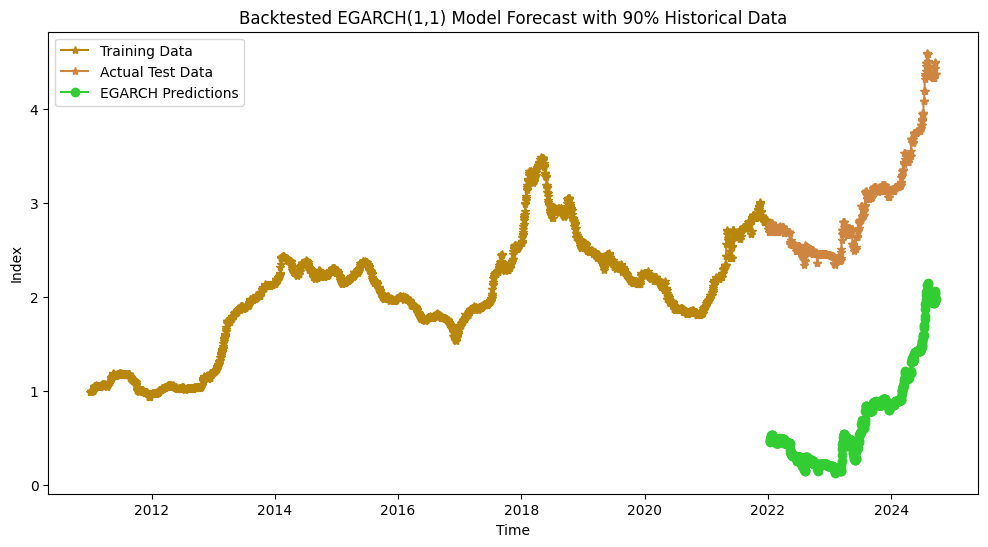

In [ ]:
# Plot the actual values, predictions, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data', color='darkgoldenrod', marker='*')
plt.plot(test_data.index, test_data, label='Actual Test Data', color='peru', marker='*')
plt.plot(test_data.index, predictions, label='EGARCH Predictions', color='limegreen', marker='o')
plt.xlabel('Time')
plt.ylabel('Index')
plt.title('Backtested EGARCH(1,1) Model Forecast with 90% Historical Data')
plt.legend()
plt.show()